# 1. IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')
sns.set(style='whitegrid')

# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Other Libraries (Calculate the running time for each model)
import time

# Libraries for machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

#importing necessary Logistic Regression library
from sklearn.linear_model import LogisticRegression
#importing necessary Extra Tree library
from sklearn.ensemble import ExtraTreesClassifier
#importing necessary Decision Tree libraries
from sklearn.tree import DecisionTreeClassifier
#importing necessary Random Forest Classifier library
from sklearn.ensemble import RandomForestClassifier
#importing necessary MLP library for Neural Network
from sklearn.neural_network import MLPClassifier
#importing necessary library for Naiye Bayes
from sklearn.naive_bayes import GaussianNB
#importing necessary library for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#importing necessary library for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
#importing necessary libraries for KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#importing necessary libraries for ANN
from keras.models import Sequential
from keras.layers import Dense

# Evaluation libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Using TensorFlow backend.


# 2. IMPORTING DATA AND READING

In [2]:
df = pd.read_csv('LoanStats_01.csv')

In [3]:
pmt = pd.read_csv('PMTHIST_01.csv')

In [4]:
# Modify the INT_PAID column in payment history into a new feature
int_paid_total = pmt.groupby('LOAN_ID')['INT_PAID'].sum()

In [5]:
df = pd.merge(df, int_paid_total, on='LOAN_ID')

In [6]:
df.head()

,LOAN_ID,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,INT_PAID
0,1120196,NaN,10000,10000,9966,36 months,12.42%,334.16,B,B4,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2029.449998
1,1119738,NaN,8000,8000,8000,36 months,15.96%,281.10,C,C5,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.889477
2,1119575,NaN,2300,2300,2300,36 months,15.27%,80.04,C,C4,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,581.199775
3,1119338,NaN,6000,6000,6000,36 months,12.42%,200.50,B,B4,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1221.470001
4,1119281,NaN,9000,9000,9000,36 months,12.69%,301.91,B,B5,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1124.838324


In [7]:
print('There are {} rows and {} columns in the dataset.'.format(df.shape[0],df.shape[1]))

There are 2601 rows and 151 columns in the dataset.


In [8]:
# Printing the name of columns
df.columns

Index(['LOAN_ID', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'INT_PAID'],
      dtype='object', length=151)

# 3. EDA AND MISSING VALUES TREATMENT

In [9]:
# This will print basic statistics for numerical columns
df.describe()

,LOAN_ID,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,INT_PAID
count,2.601000e+03,0.0,2601.00000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,15.000000,2601.000000
mean,1.089074e+06,NaN,13152.04729,13067.502884,13008.580161,397.844687,66381.725875,14.615656,0.098808,709.300269,...,NaN,NaN,NaN,NaN,NaN,NaN,4368.347333,50.692667,0.800000,2714.518180
std,2.986247e+04,NaN,8071.22613,7994.476279,7963.110928,234.061656,40592.394321,6.463084,0.385111,32.409795,...,NaN,NaN,NaN,NaN,NaN,NaN,3486.255922,18.260402,1.934647,3024.806853
min,4.382640e+05,NaN,1000.00000,1000.000000,1000.000000,24.730000,4800.000000,0.000000,0.000000,660.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,400.000000,26.850000,0.000000,0.000000
25%,1.078901e+06,NaN,7025.00000,7000.000000,7000.000000,228.270000,41000.000000,9.780000,0.000000,685.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1705.315000,38.025000,0.000000,867.258648
50%,1.093044e+06,NaN,11200.00000,11000.000000,11000.000000,355.390000,58412.000000,14.700000,0.000000,705.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3395.570000,45.000000,0.000000,1676.185156
75%,1.103966e+06,NaN,18000.00000,18000.000000,17925.000000,505.630000,80000.000000,19.680000,0.000000,730.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,6187.745000,55.500000,0.000000,3249.710000
max,1.120196e+06,NaN,35000.00000,35000.000000,35000.000000,1306.090000,600000.000000,29.940000,5.000000,810.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,12706.000000,87.500000,6.000000,20319.879999


Variables rejected:

'funded_amnt', 'funded_amnt_inv' are directly related to loan_amnt, hence removing these.

'grade', 'sub_grade', 'int_rate ,'emp_title', 'url','title', 'zip_code' are not considered.

In [10]:
# Removing all other predictors and their associated predictor columns containing amount related data other than loan amount which we will be using for modelling
drop_list = ['funded_amnt', 
             'funded_amnt_inv', 
             'last_pymnt_amnt', 
             'delinq_amnt']
df = df.drop(drop_list, axis=1)

In [11]:
df.shape

(2601, 147)

In [12]:
# Removing grade, sub grade and interest columns
drop_list1 = ['grade', 
              'sub_grade', 
              'int_rate']
df = df.drop(drop_list1, axis=1)

In [13]:
df.shape

(2601, 144)

In [14]:
drop_list3 = ['LOAN_ID', 
              'member_id', 
              'issue_d']
df = df.drop(drop_list3, axis=1)

In [15]:
df.shape

(2601, 141)

In [16]:
df.head()

,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,INT_PAID
0,10000,36 months,334.16,AT&T,4 years,MORTGAGE,100000,Verified,Fully Paid,n,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2029.449998
1,8000,36 months,281.10,Santa Clara Unified School District,10+ years,RENT,43181,Source Verified,Charged Off,n,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018.889477
2,2300,36 months,80.04,Aviva Center,4 years,RENT,35000,Source Verified,Fully Paid,n,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,581.199775
3,6000,36 months,200.50,pat salmon and sons,6 years,RENT,46000,Not Verified,Fully Paid,n,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1221.470001
4,9000,36 months,301.91,mpls public school,10+ years,MORTGAGE,61000,Source Verified,Charged Off,n,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1124.838324


In [17]:
# Dropping another column that I deem unnecessary. 
# It contains data in an unorganized way which will not be very helpful for modeling. 
drop_list4 = ['emp_title']
df = df.drop(drop_list4, axis=1)

In [18]:
# Url is also not much of importance to us. Dropping it. 
drop_list5 = ['url']
df = df.drop(drop_list5, axis=1)

In [19]:
# Exploring what is there in purpose predictor
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'major_purchase', 'medical',
       'small_business', 'car', 'house', 'other', 'home_improvement',
       'renewable_energy', 'wedding', 'moving', 'vacation'], dtype=object)

As we can see there are values like credit card, debt_consolidation etc which conveys more of less similar information (debt). Therefore, reducing it by recoding similar attributes to a standard value.

In [20]:
# Recode loan purpose values
df['purpose_n'] = np.nan
df.loc[(df['purpose'] == 'debt_consolidation')|(df['purpose'] =="credit_card"), 'purpose_n'] = 'debt' 

df.loc[(df['purpose'] == 'home_improvement')|(df['purpose'] =="major_purchase")|
                 (df['purpose'] == 'car')|(df['purpose'] =="house")|
                 (df['purpose'] == 'vacation')|(df['purpose'] =="renewable_energy"),
                 'purpose_n'] = 'major_purchases' 
               
df.loc[(df['purpose'] == 'small_business')|(df['purpose'] =="medical")|
                 (df['purpose'] == 'moving')|(df['purpose'] =="wedding")|
                 (df['purpose'] == 'educational'),
                 'purpose_n'] = 'life_events'
              
df.loc[(df['purpose'] == 'other'), 'purpose_n'] = 'other'

In [21]:
df['title'].unique()
# There are too many unique values to get a meaning out of it. Also, it contains more or less similar information as Purpose predictor which is much cleaner. 
# So, we will drop the title field.

array(['Credit Consolidation Loan 1', 'Debt Consolidation Loan',
       'Credit Cards', ..., 'Payoff Loan', 'business loan', 'others'],
      dtype=object)

In [22]:
# As we have created a new column after recoding the values under purpose, dropping the original purpose predictor. 
# Also, the title predictor contains too many unique values and is more or less similar to purpose predictor which we recoded above
drop_list6 = ['purpose','title']
df = df.drop(drop_list6, axis=1)
df.shape

(2601, 138)

In [23]:
print(df['zip_code'].head())
print(df['addr_state'].value_counts().head(5))

0    300xx
1    950xx
2    917xx
3    720xx
4    551xx
Name: zip_code, dtype: object
CA    459
NY    287
FL    216
TX    172
NJ    108
Name: addr_state, dtype: int64


In [24]:
#Zip code and State contains similar information. Also, zip code does not even have the entire zip code value and just 3 digits. So, dropping it and keeping state. 
drop_list7 = ['zip_code']
df = df.drop(drop_list7, axis=1)

In [25]:
df.earliest_cr_line.head(3)

0    Aug-2004
1    Apr-1979
2    Nov-2007
Name: earliest_cr_line, dtype: object

In [26]:
import datetime

# Calculate time since first credit line
now = datetime.datetime.today()
def credit_age (x):
    if x != 'nan': 
        c1 = pd.to_datetime(x)
        return (now-c1).days/365.25
        
    else:
        return None

df['earliest_cr_line_n'] = df['earliest_cr_line'].astype(str)
df['earliest_cr_line_n'] = df['earliest_cr_line_n'].apply(credit_age)

In [27]:
df['earliest_cr_line_n'].head()

0    15.843943
1    41.180014
2    12.594114
3    18.264203
4    22.844627
Name: earliest_cr_line_n, dtype: float64

In [28]:
# Removing the original columns "earliest_cr_line" because we have transformed it to a new one
drop_list8 = ['earliest_cr_line']
df = df.drop(drop_list8, axis=1)

In [29]:
def null_values(df): 
        mis_val = df.isnull().sum() #gives sum of missing values (null values)
        mis_val_percent = 100 * df.isnull().sum() / len(df) #getting percentage of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #creating a DF containing missing value count and it's percentage
        mis_val_table_ren_columns = mis_val_table.rename( 
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #renaming the columns
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) #getting the percentage of missing values in descending order and rounding it to 1 decimal
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.") #printing number of columns and missing value count
        return mis_val_table_ren_columns

In [30]:
# Missing values statistics
miss_values = null_values(df)

Dataframe has 137 columns.
There are 94 columns that have missing values.


## 3.1 Drop features missing more than 80% data

In [31]:
# First calculate the percentage of missing data for each feature:
missing_features = df.isnull().mean().sort_values(ascending=False)

Text(0, 0.5, 'Feature count')

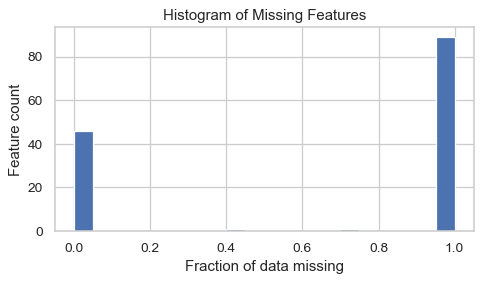

In [32]:
# Let's visualize the distribution of missing data percentages:
plt.figure(figsize=(6,3), dpi=90)
missing_features.plot.hist(bins=20)
plt.title('Histogram of Missing Features')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

Assuming that it will be very difficult to accurately impute data with more than 30% missing values, dropping such columns. Let's create a list of all columns missing more than 80% data in an alphabetical list:

In [33]:
drop_list9 = sorted(list(missing_features[missing_features > 0.8].index)) #creating list to store the column names with over 30% missing values
print(drop_list9)

['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'debt_settlement_flag_date', 'deferral_term', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_o

In [34]:
# Number of features to be dropped?
len(drop_list9)

89

In [35]:
# Dropping these features
df.drop(drop_list9, axis=1, inplace=True)

In [36]:
print('Now we are left with {} columns'.format(df.shape[1]))
print('The remaining columns are as follows:')
print(df.columns)

Now we are left with 48 columns
The remaining columns are as follows:
Index(['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan',
       'desc', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'debt_settlement_flag', 'INT_PAID', 'purpose_n', 'earliest_cr_line_n'],
      dty

That's great. We have considerably reduced the features from 136 to 48.

In [37]:
print(df['pymnt_plan'].unique())
print(df['pymnt_plan'].value_counts())

['n']
n    2601
Name: pymnt_plan, dtype: int64


In [38]:
# As there are all 'no' values. Dropping it. 
drop_list10 = ['pymnt_plan']
df = df.drop(drop_list10, axis=1)

## 3.2 Drop features to reduce multicollinearity

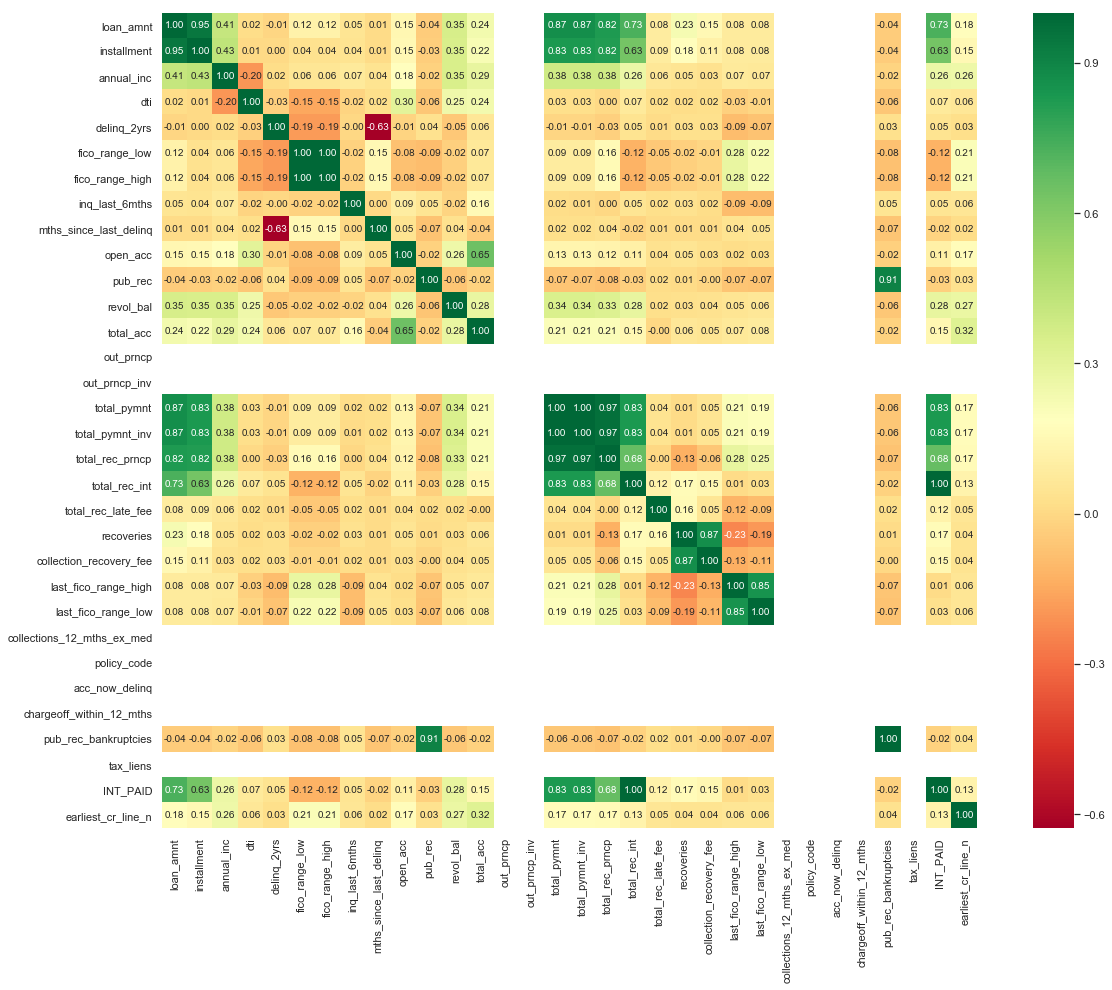

In [39]:
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True, annot=True, fmt = ".2f", cmap = "RdYlGn")

From the above heatmap we can observe that there is a high correlation between quite a few variables. For example:

- fico_range_high and fico_range_low
- last_fico_range_high and last_fico_range_low

Therefore, instead of keeping both. I am taking average of such values to eliminate one columns and reduce multicollinearity.

In [40]:
# Calcualte mean fico score
df['fico_avg'] = (df['fico_range_high'] + df['fico_range_low'])/2
# Calcualte mean last_fico score
df['last_fico_avf'] = (df['last_fico_range_high'] + df['last_fico_range_low'])/2
# Dropping the columns that are now transformed to new columns
drop_list11 = ['fico_range_low', 'fico_range_high','last_fico_range_high','last_fico_range_low','last_fico_range_high']
df = df.drop(drop_list11,axis=1)

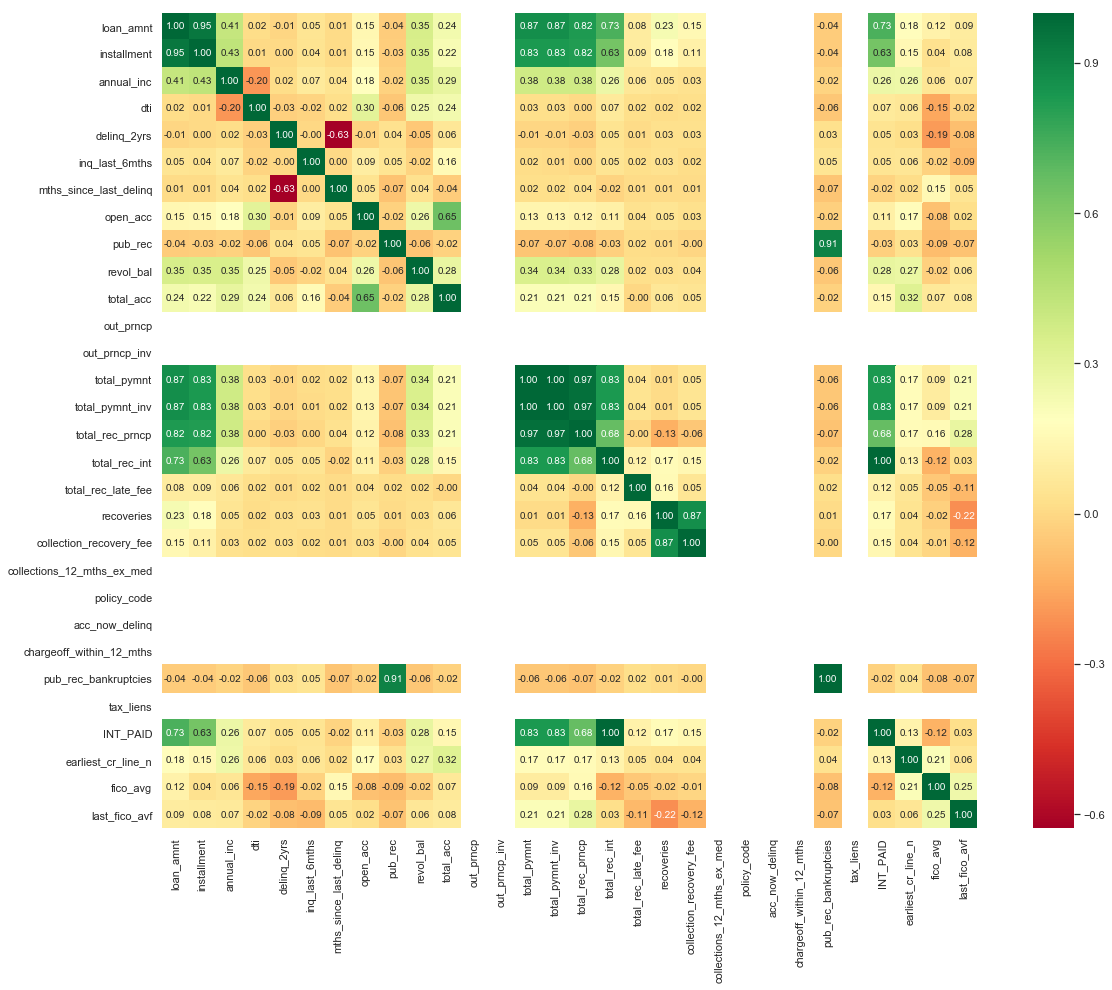

In [41]:
#### Rechecking correlation 
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True, annot=True, fmt = ".2f", cmap = "RdYlGn")

In [42]:
drop_list11 = ['installment', 'mths_since_last_delinq', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                'total_rec_int', 'pub_rec']
df = df.drop(drop_list11, axis=1)

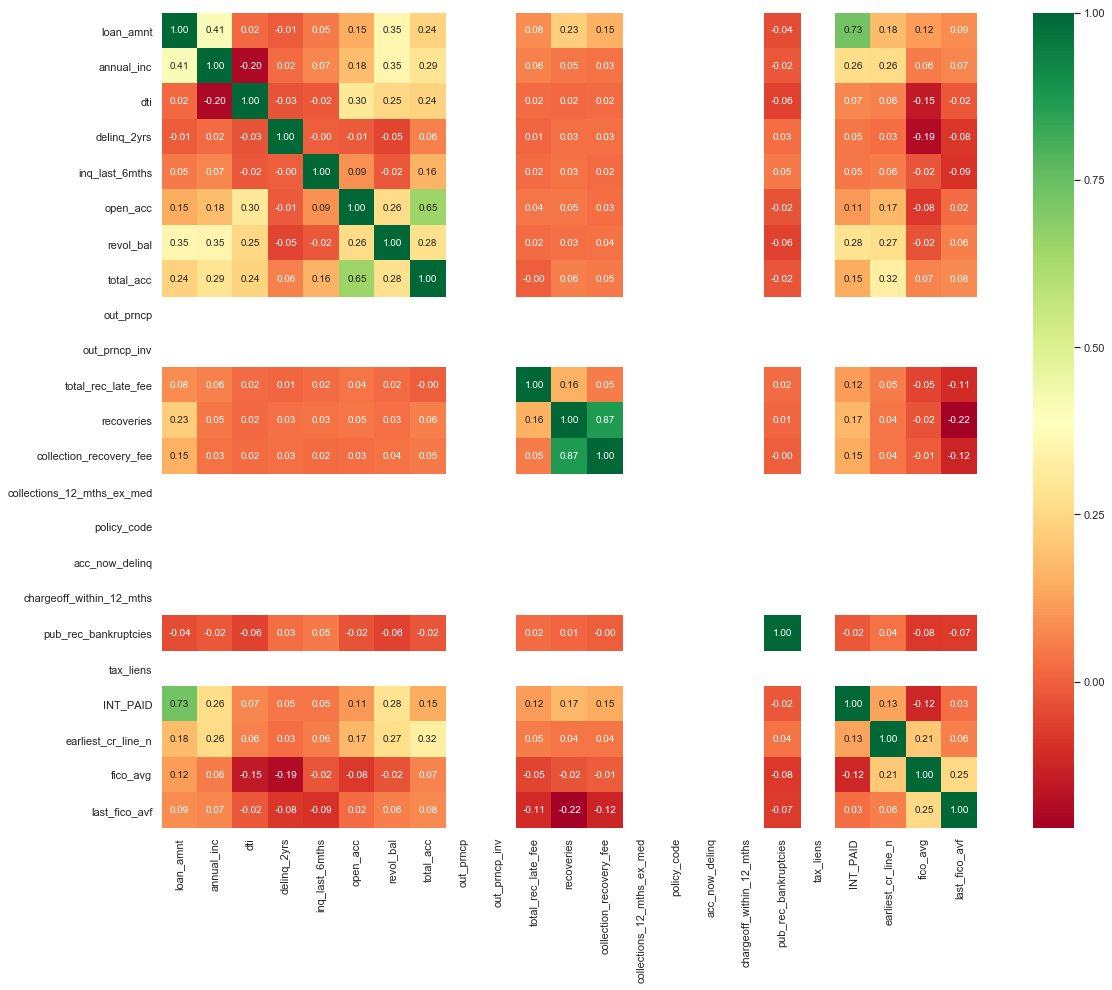

In [43]:
#### Rechecking correlation 
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True, annot=True, fmt = ".2f", cmap = "RdYlGn")

In [44]:
drop_list12 = ['out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'tax_liens']
df = df.drop(drop_list12, axis=1)

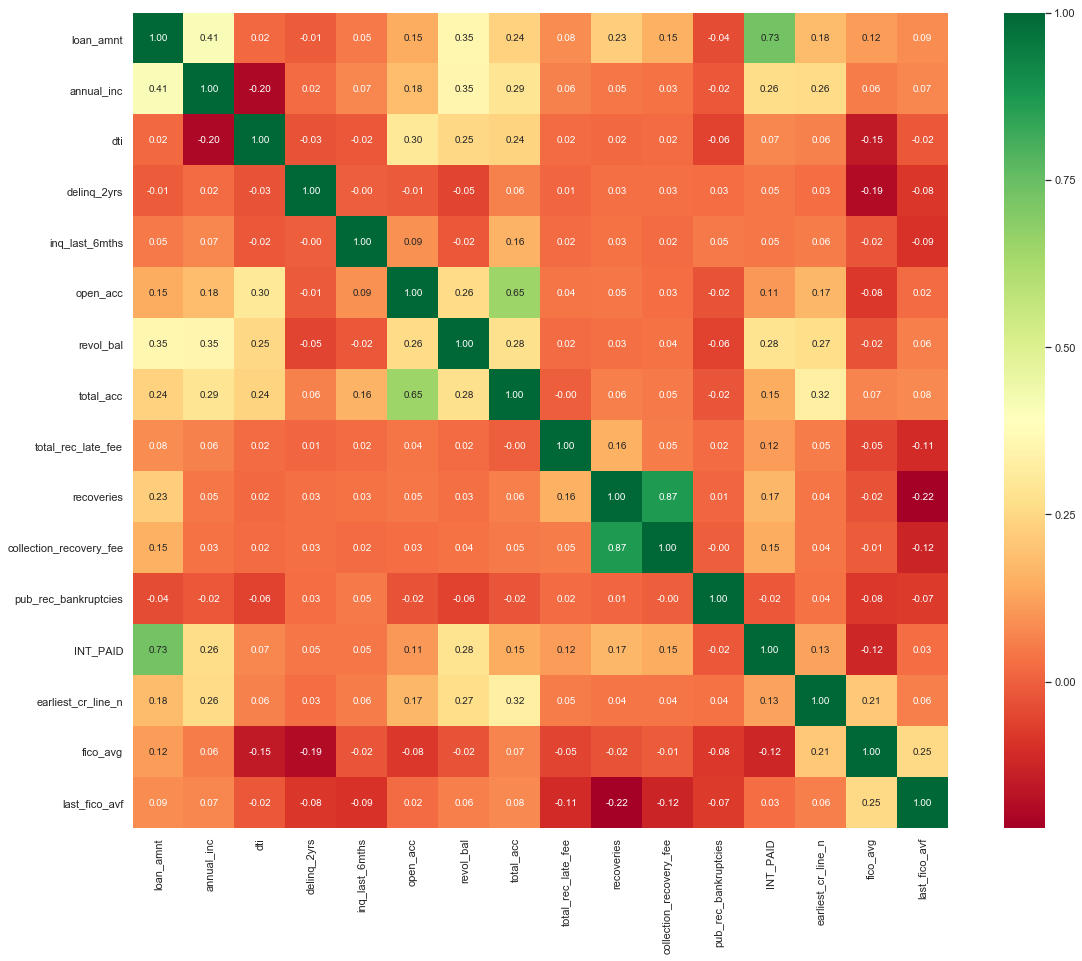

In [45]:
#### Rechecking correlation 
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True, annot=True, fmt = ".2f", cmap = "RdYlGn")

In [46]:
drop_list13 = ['open_acc', 'collection_recovery_fee']
df = df.drop(drop_list13, axis=1)

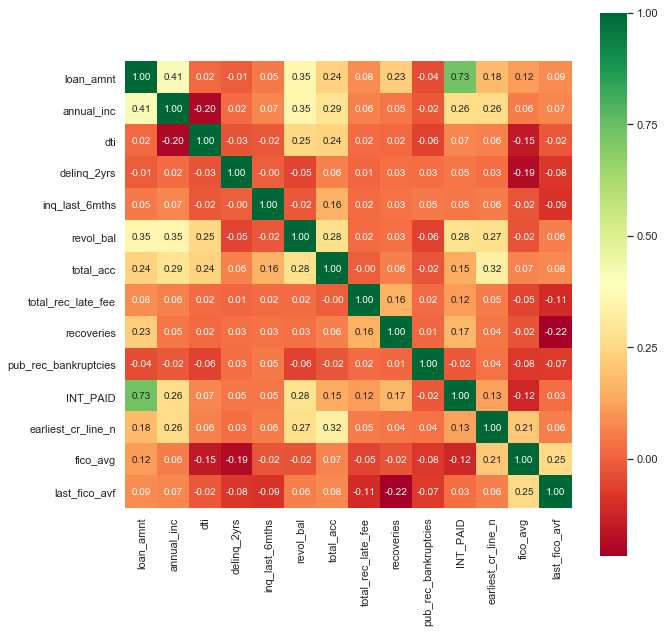

In [47]:
#### Rechecking correlation 
cor = df.corr() 
plt.subplots(figsize=(10,10))
sns.heatmap(cor, square = True, annot=True, fmt = ".2f", cmap = "RdYlGn")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 0 to 2600
Data columns (total 29 columns):
loan_amnt               2601 non-null int64
term                    2601 non-null object
emp_length              2506 non-null object
home_ownership          2601 non-null object
annual_inc              2601 non-null int64
verification_status     2601 non-null object
loan_status             2601 non-null object
desc                    1462 non-null object
addr_state              2601 non-null object
dti                     2601 non-null float64
delinq_2yrs             2601 non-null int64
inq_last_6mths          2601 non-null int64
revol_bal               2601 non-null int64
revol_util              2594 non-null object
total_acc               2601 non-null int64
initial_list_status     2601 non-null object
total_rec_late_fee      2601 non-null float64
recoveries              2601 non-null float64
last_pymnt_d            2596 non-null object
last_credit_pull_d      2601 non-null obj

In [49]:
df['initial_list_status'].value_counts()

f    2601
Name: initial_list_status, dtype: int64

In [50]:
df = df.drop('initial_list_status', axis=1)

In [51]:
df['application_type'].value_counts()

Individual    2601
Name: application_type, dtype: int64

In [52]:
df = df.drop('application_type', axis=1)

In [53]:
df = df.drop(['last_pymnt_d', 'last_credit_pull_d'], axis=1)
# df['last_credit_pull_d'].value_counts()

In [54]:
df.columns

Index(['loan_amnt', 'term', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'desc', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_late_fee', 'recoveries', 'pub_rec_bankruptcies',
       'hardship_flag', 'debt_settlement_flag', 'INT_PAID', 'purpose_n',
       'earliest_cr_line_n', 'fico_avg', 'last_fico_avf'],
      dtype='object')

In [55]:
# Majority of the trades never delinquent (can been seen from mean). Therefore, removing pct_tl_nvr_dlq.
# Most of the values are missing and not that relevant of a feature. Therefore, removing them.
drop_list14 = ['hardship_flag','debt_settlement_flag']
df = df.drop(drop_list14, axis=1)

In [56]:
# Missing values statistics
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 23 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
desc,1139,43.8
emp_length,95,3.7
revol_util,7,0.3


In [57]:
df = df.drop('desc', axis=1)

With this, I am done with data cleaning. FINALLY!

I’ve been able to reduce the number of columns from 150 to 22 without losing any meaningful data from our model.

Data Cleaning Summary:

- Dropped Data that must have been captured after the application form. This would have messed up our model.

- Imputed missing values with either 0 or median

- Created new feature out of existing (taking average of FICO_low and FICO_high)

"Our goal here is to predict whether a person will be able to pay off a loan or he/she will default. We can see from data dictionary that loan_status is the only field that describes a loan status. Therefore, we will be using it as target column."

# 4. TARGET VARIABLE

In [58]:
#What are the value counts for this variable?
df['loan_status'].value_counts()

Fully Paid     2161
Charged Off     440
Name: loan_status, dtype: int64

In [59]:
loan_status_map = {
    'Charged Off': 1,
    'Fully Paid': 0,
    }

In [60]:
df['loan_status'] = df['loan_status'].map(loan_status_map)


Status counts as percentages:

In [61]:
df['loan_status'].value_counts(normalize=True, dropna=False)

0    0.830834
1    0.169166
Name: loan_status, dtype: float64

About 83% of the loans have been fully paid and 17% have charged off, so we can see that we are dealing with an imbalanced dataset. This means one result type is dominating the other one(s). In this case, we have a lot of "fully paid" records but not many records of charged off records.

- 0: Fully Paid
- 1: Charged Off

In [62]:
df['loan_status'].value_counts(dropna=False)

0    2161
1     440
Name: loan_status, dtype: int64

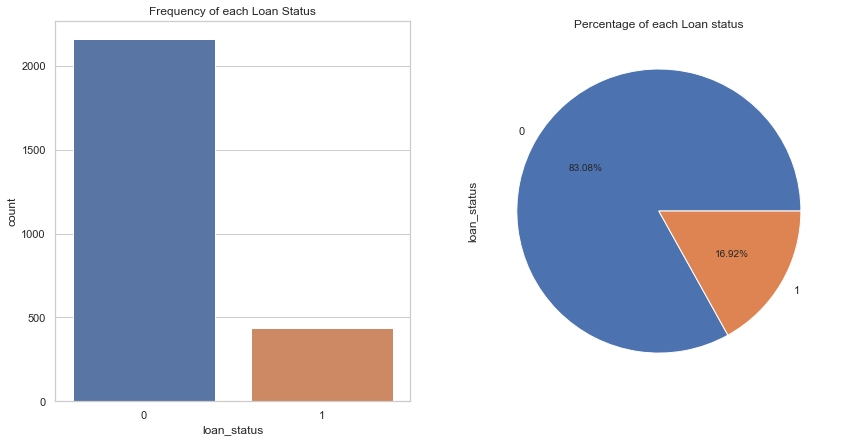

In [63]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

# 5. FURTHER PREPROCESSING AND FEATURE ENGINERRING

We'll inspect each feature separately as it is not in readable range, and do the following:

- Drop the feature if it is not useful for predicting the Target variable.
- View summary statistics and visualize, plot against the Target variable.
- Modify the feature to make it useful for modeling, if necessary.
- We define a function for plotting a variable and comparing with the Target variable.


In [64]:
# Print the remaining predictor for future reference:
print(list(df.columns))

['loan_amnt', 'term', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_late_fee', 'recoveries', 'pub_rec_bankruptcies', 'INT_PAID', 'purpose_n', 'earliest_cr_line_n', 'fico_avg', 'last_fico_avf']


## 5.1 loan_amnt

In [65]:
df['loan_amnt'].describe()

count     2601.00000
mean     13152.04729
std       8071.22613
min       1000.00000
25%       7025.00000
50%      11200.00000
75%      18000.00000
max      35000.00000
Name: loan_amnt, dtype: float64

In [66]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2161.0,12850.381768,7951.041826,1000.0,7000.0,10625.0,17000.0,35000.0
1,440.0,14633.636364,8492.326991,1000.0,8000.0,13225.0,20000.0,35000.0


## 5.2 term

In [67]:
df['term'].value_counts(dropna=False)

 36 months    2057
 60 months     544
Name: term, dtype: int64

In [68]:
df['term'] = df['term'].apply(lambda x: np.int8(x.split()[0]))

In [69]:
df['term'].value_counts(normalize=True)

36    0.79085
60    0.20915
Name: term, dtype: float64

In [70]:
#Compare the charge-off rate by loan period:
df.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,1]

term
36    0.138065
60    0.286765
Name: loan_status, dtype: float64

## 5.3 emp_length

In [71]:
df['emp_length'].head(3)

0      4 years
1    10+ years
2      4 years
Name: emp_length, dtype: object

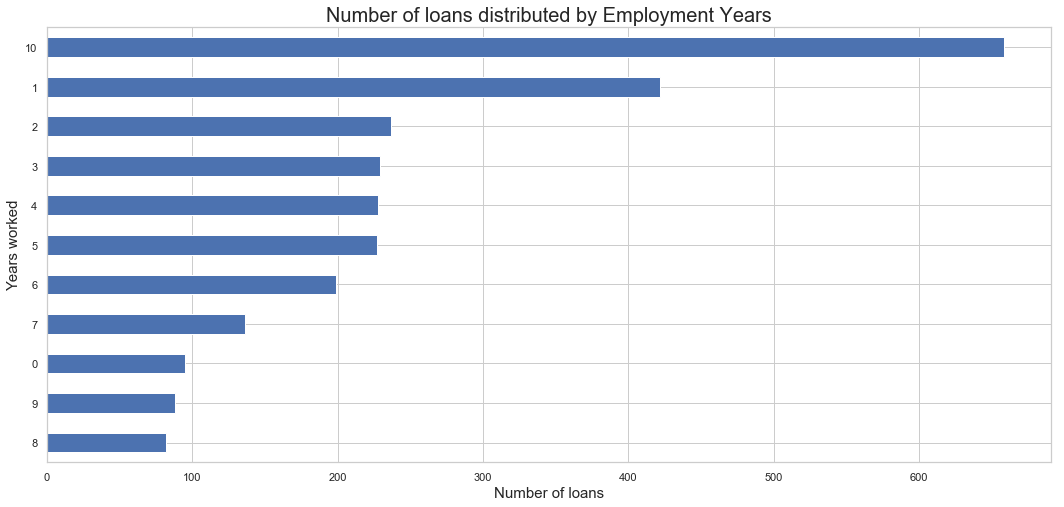

In [72]:
df['emp_length'].fillna(value=0,inplace=True) #filling the missing values with 0 
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True ) #checking not numeric value and then replacng it with '' to removing string
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8)) #plotting the bar to see the emp_length
plt.title('Number of loans distributed by Employment Years',fontsize=20) #plotting the title
plt.xlabel('Number of loans',fontsize=15) #plotting number of loans for x axis
plt.ylabel('Years worked',fontsize=15); #plotting years worked for y axis

The column looks fine. Also, it can be seen that people who have worked for 10 or more years are more likely to take a loan.

## 5.4 home_ownership

In [73]:
df['home_ownership'].value_counts(dropna=False)

RENT        1362
MORTGAGE    1032
OWN          207
Name: home_ownership, dtype: int64

In [74]:

df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,1]

home_ownership
MORTGAGE    0.165698
OWN         0.217391
RENT        0.164464
Name: loan_status, dtype: float64

There is not much difference in terms of home ownership. However,people who own a house have a higher chance of charge-off.

## 5.5 annual_inc

In [75]:
df['log_annual_inc'] = df['annual_inc'].apply(lambda x: np.log10(x+1))
df.drop('annual_inc', axis=1, inplace=True)

In [76]:
df['log_annual_inc'].describe()

count    2601.000000
mean        4.762436
std         0.223837
min         3.681332
25%         4.612794
50%         4.766510
75%         4.903095
max         5.778152
Name: log_annual_inc, dtype: float64

In [77]:
df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2161.0,4.766945,0.224432,3.681332,4.623260,4.778158,4.903095,5.778152
1,440.0,4.740292,0.219806,3.924331,4.591076,4.740371,4.875067,5.505694


Obviously, people with higher income are more likely to pay off their loans.

## 5.6 verification_status

In [78]:

df['verification_status'].value_counts()

Not Verified       940
Source Verified    850
Verified           811
Name: verification_status, dtype: int64

## 5.7 addr_state

In [79]:
df['addr_state'].unique() #seeing the unique values of address state column

array(['GA', 'CA', 'AR', 'MN', 'MO', 'DC', 'TX', 'NY', 'FL', 'NC', 'VA',
       'OH', 'IL', 'CT', 'PA', 'AZ', 'LA', 'MA', 'MI', 'CO', 'NH', 'NJ',
       'MD', 'OK', 'NV', 'WA', 'WI', 'VT', 'UT', 'AL', 'HI', 'OR', 'SC',
       'KS', 'RI', 'NM', 'WY', 'KY', 'WV', 'SD', 'AK', 'DE', 'MT'],
      dtype=object)

In [80]:
# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID'] #all western states
south_west = ['AZ', 'TX', 'NM', 'OK'] #all south western states
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ] #all south eastern states
mid_west = ['MN', 'MO', 'IL',   'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND'] #all mid western states
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME'] #all north eastern states

In [81]:
df['region'] = np.nan #creating new column region with all nan values
def finding_regions(state): #creating fuction to recode states into region
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    
df['region'] = df['addr_state'].apply(finding_regions) #apply function to the new column

In [82]:

#Calculate the charge-off rates by region:
df.groupby('region')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values()

region
SouthWest    0.153285
NorthEast    0.155556
SouthEast    0.171521
West         0.176647
MidWest      0.188525
Name: loan_status, dtype: float64

In [83]:
#Calculate the charge-off rates by state:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values()

addr_state
AR    0.066667
OR    0.074074
NH    0.083333
WV    0.090909
KY    0.090909
AZ    0.095238
RI    0.100000
VA    0.106383
MT    0.111111
PA    0.113924
MD    0.115942
WI    0.129032
IL    0.134021
OK    0.136364
MA    0.142857
CT    0.142857
WA    0.145161
FL    0.148148
HI    0.153846
NJ    0.157407
TX    0.162791
LA    0.166667
CA    0.178649
MO    0.179487
NY    0.181185
MN    0.189189
NV    0.200000
OH    0.220339
NC    0.222222
KS    0.222222
GA    0.225000
MI    0.231707
AL    0.259259
CO    0.261905
SC    0.277778
NM    0.294118
UT    0.333333
DE    0.400000
VT    0.400000
SD    0.666667
Name: loan_status, dtype: float64

## 5.8 dti

In [84]:
df['dti'].describe()

count    2601.000000
mean       14.615656
std         6.463084
min         0.000000
25%         9.780000
50%        14.700000
75%        19.680000
max        29.940000
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Ratio')

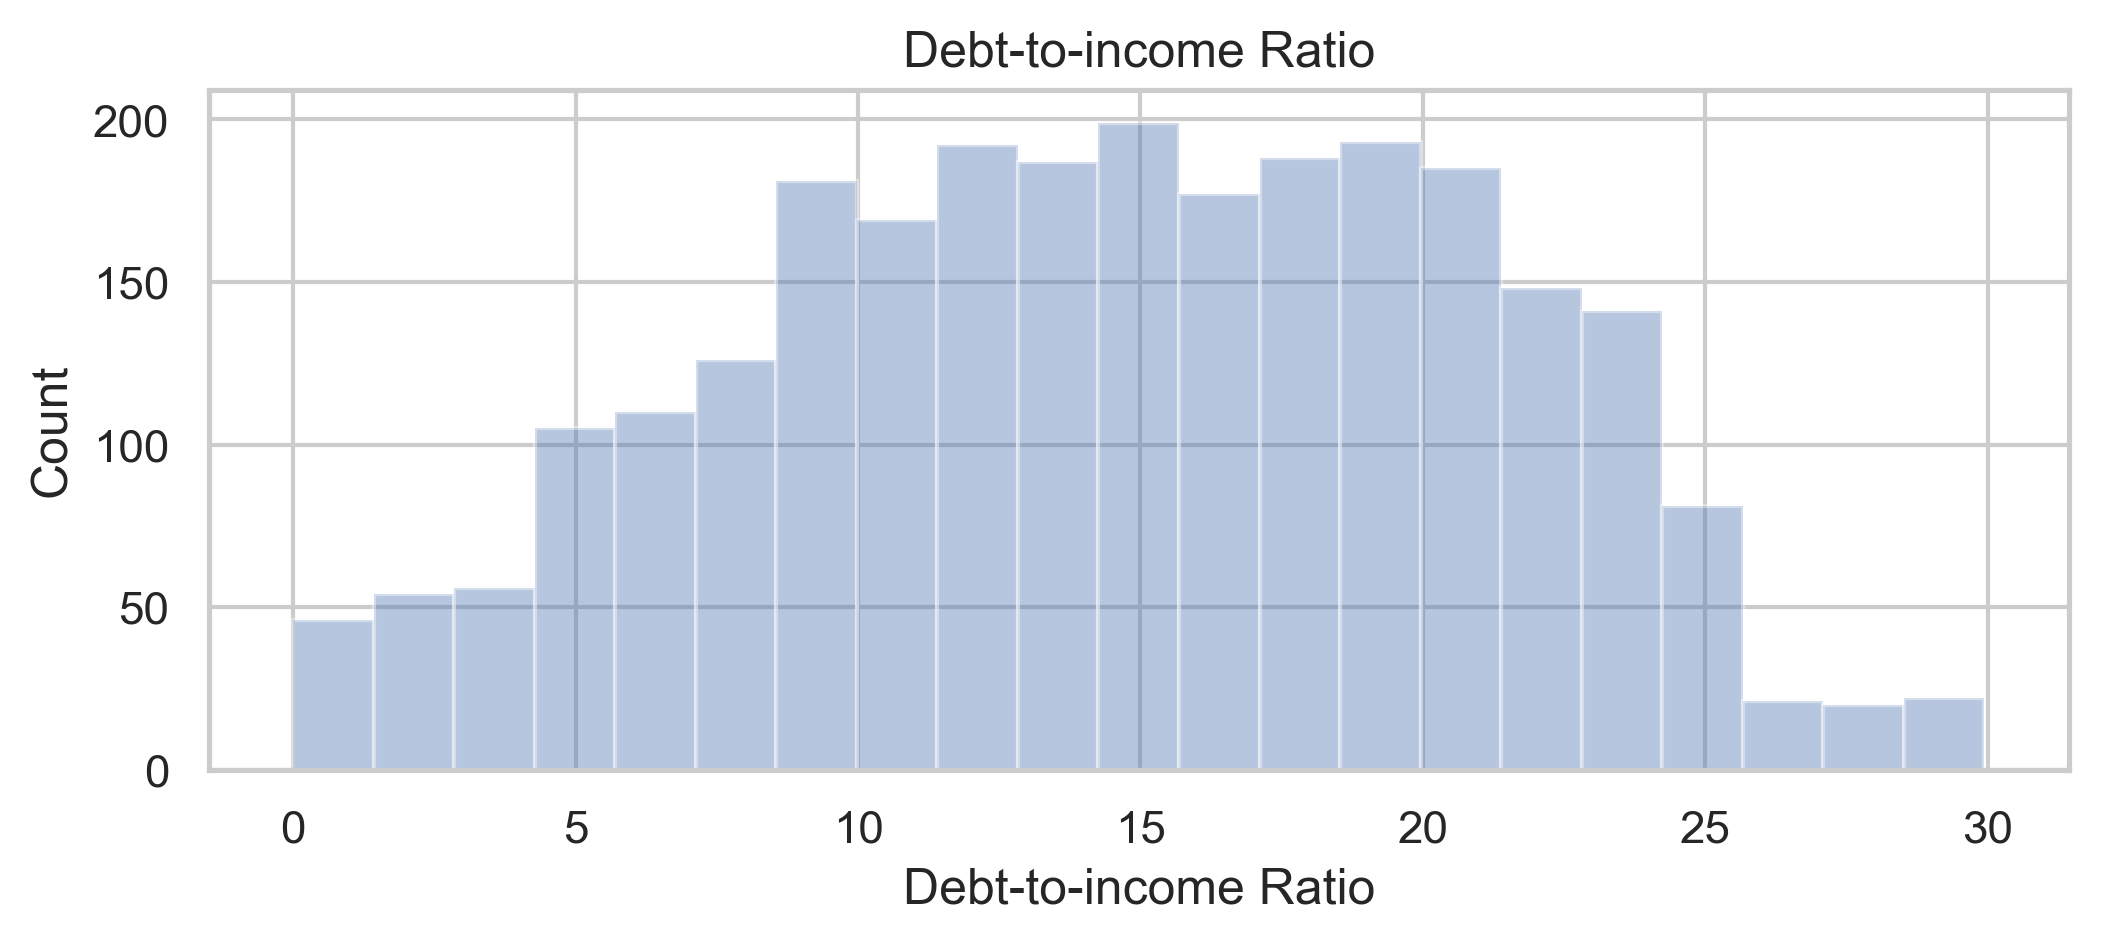

In [85]:
plt.figure(figsize=(8,3), dpi=300)
sns.distplot(df.loc[df['dti'].notnull() & (df['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [86]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2161.0,14.508066,6.515722,0.0,9.680,14.59,19.5900,29.94
1,440.0,15.144068,6.178053,0.0,10.815,15.12,19.9525,29.52


## 5.9 delinq_2yrs

In [87]:
df.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2161.0,0.092550,0.357130,0.0,0.0,0.0,0.0,4.0
1,440.0,0.129545,0.499694,0.0,0.0,0.0,0.0,5.0


In [88]:
df = df.drop(['delinq_2yrs'],axis=1)

## 5.10 inq_last_6mths

## 5.11 revol_bal

In [89]:
df['revol_bal'].describe()

count      2601.000000
mean      14436.312957
std       12683.817488
min           0.000000
25%        6673.000000
50%       11745.000000
75%       18913.000000
max      141931.000000
Name: revol_bal, dtype: float64

In [90]:
#doing log transform
df['revol_bal'] = df['revol_bal'].apply(lambda x: np.log10(x+1))

In [91]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2161.0,3.956280,0.629685,0.0,3.822822,4.065916,4.274204,5.152080
1,440.0,3.923157,0.722760,0.0,3.837825,4.083148,4.285498,4.842335


## 5.12 revol_util

In [92]:
df['revol_util'].head()

0    84.9%
1    70.4%
2    75.2%
3    66.1%
4    16.7%
Name: revol_util, dtype: object

In [93]:
#We see that term, emp_length, revol_util columns contains numeric values, but is formatted as object. 
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') #stripping the % symbol and converting the type to "Float"

In [94]:
df['revol_util'].describe()

count    2594.000000
mean       57.733269
std        26.022018
min         0.000000
25%        41.025000
50%        61.050000
75%        79.400000
max        99.900000
Name: revol_util, dtype: float64

In [95]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2157.0,56.765600,26.107450,0.0,39.6,60.0,77.9,99.9
1,437.0,62.509611,25.083412,0.0,47.4,66.1,83.5,99.8


## 5.13 total_acc

Text(0.5, 1.0, 'Total Number of Credit Lines')

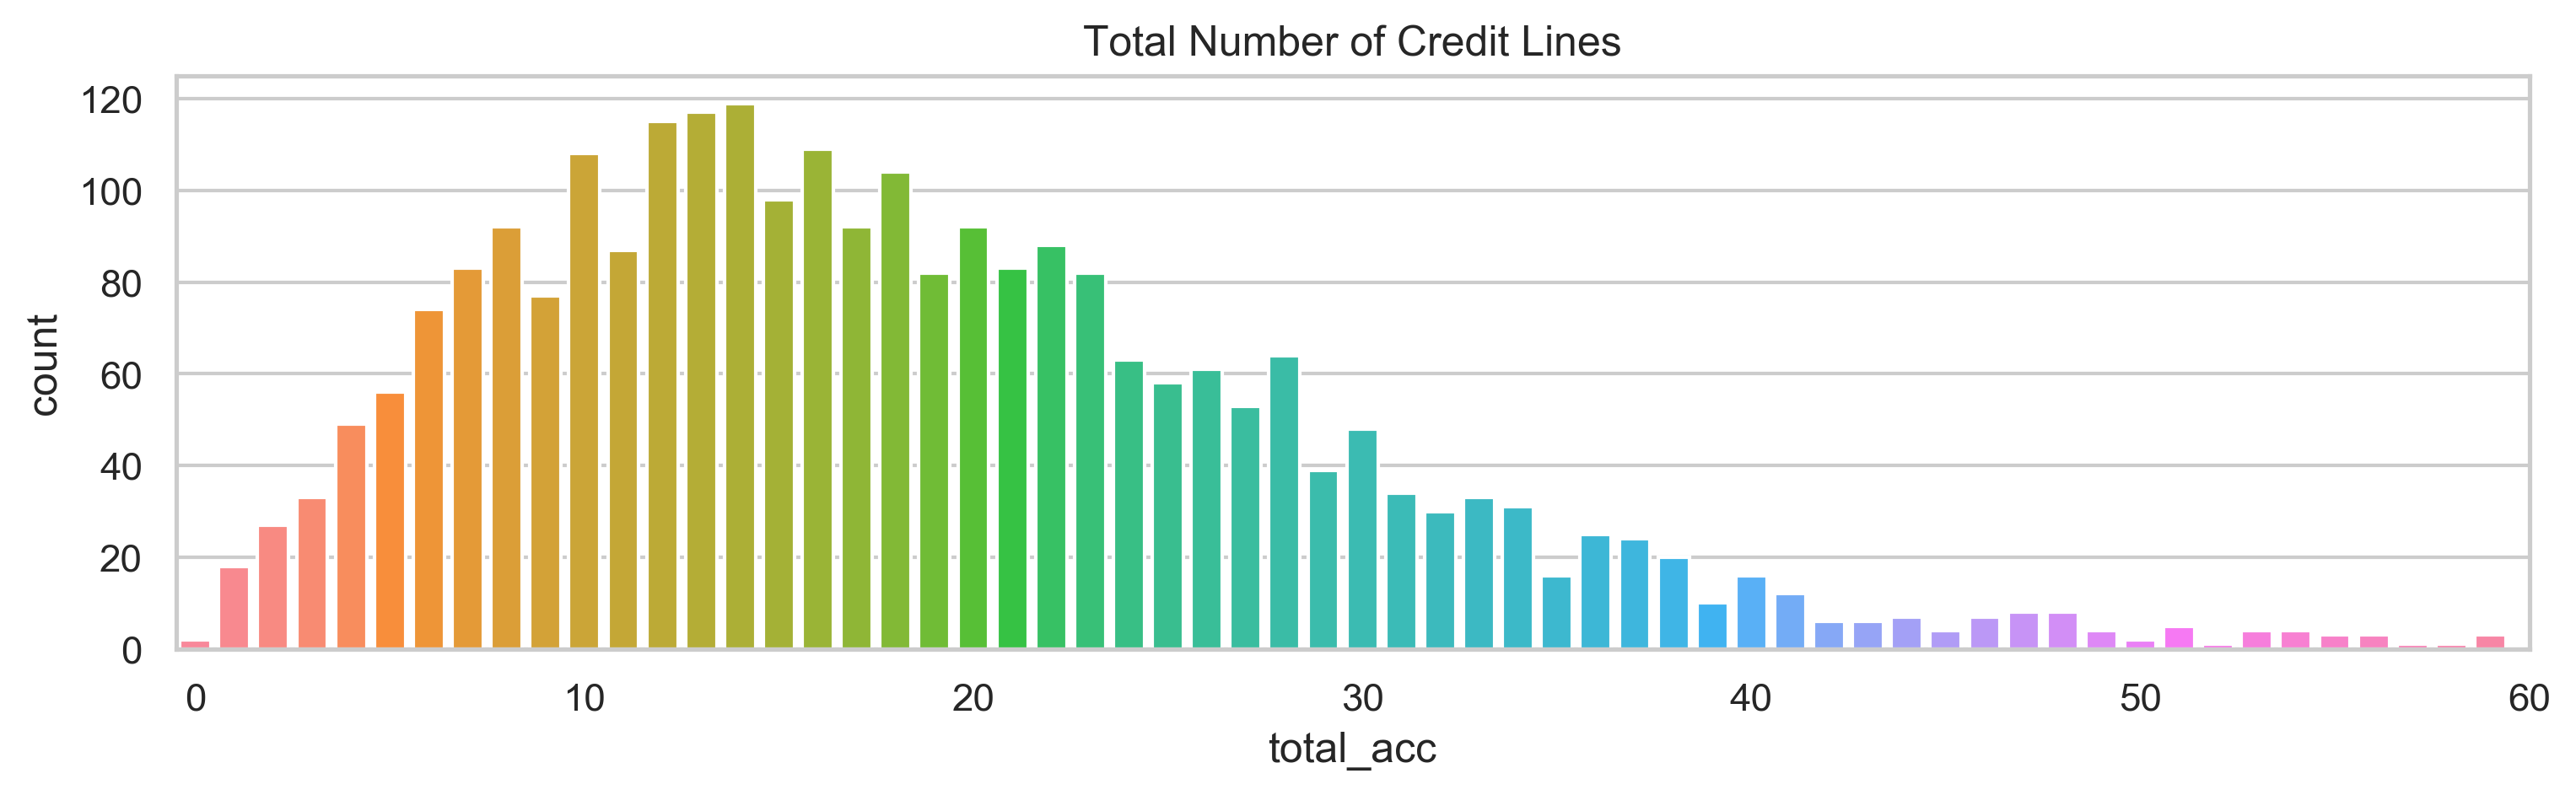

In [96]:
plt.figure(figsize=(12,3), dpi=300)
sns.countplot(df['total_acc'], order=sorted(df['total_acc'].unique()), saturation=1)
_, _ = plt.xticks(np.arange(0, 70, 10), np.arange(0, 70, 10))
plt.title('Total Number of Credit Lines')

In [97]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2161.0,21.576122,10.332207,3.0,14.0,20.0,28.0,63.0
1,440.0,21.290909,10.731849,3.0,14.0,19.0,27.0,62.0


## 5.14 pub_rec_bankruptcies

In [98]:
df['pub_rec_bankruptcies'].value_counts().sort_index()

0    2544
1      56
2       1
Name: pub_rec_bankruptcies, dtype: int64

In [99]:
#comparing statistics by target variable:
df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2161.0,0.016196,0.126259,0.0,0.0,0.0,0.0,1.0
1,440.0,0.052273,0.232828,0.0,0.0,0.0,0.0,2.0


In [100]:
df = df.drop(['region'],axis=1)

In [101]:
df.columns

Index(['loan_amnt', 'term', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'addr_state', 'dti',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_late_fee', 'recoveries', 'pub_rec_bankruptcies', 'INT_PAID',
       'purpose_n', 'earliest_cr_line_n', 'fico_avg', 'last_fico_avf',
       'log_annual_inc'],
      dtype='object')

## 5.15 Dealing with Remaining missing values: Data imputation
To deal with missing values in each column, I will do some data imputation dealing with each dtype differently. For dtype = object, I will use the most frequent values while for numerical dtypes, I will use the median

In [102]:
obj_cols = df.columns[df.dtypes==object]

#Imputer function
imputer = lambda x:x.fillna(x.value_counts().index[0]) 

#Impute dtype=object with most frequent value
df[obj_cols] = df[obj_cols].apply(imputer) 

#Impute the rest of df with median
df = df.fillna(df.median(axis=0))

In [103]:
missing_fractions = df.isnull().mean().sort_values(ascending=False) # Fraction of data missing for each variable
print(missing_fractions[missing_fractions > 0]) # Print variables that are missing data

Series([], dtype: float64)


In [104]:
df.fillna(df.median(), inplace=True)

In [105]:
corr = df.corr()['loan_status'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 INT_PAID                0.009530
dti                     0.036899
inq_last_6mths          0.075289
revol_util              0.082621
loan_amnt               0.082846
pub_rec_bankruptcies    0.090025
total_rec_late_fee      0.136125
term                    0.161314
recoveries              0.488188
loan_status             1.000000
Name: loan_status, dtype: float64

Most Negative Correlations:
 last_fico_avf        -0.469229
fico_avg             -0.112736
log_annual_inc       -0.044650
revol_bal            -0.019216
total_acc            -0.010284
earliest_cr_line_n   -0.008690
INT_PAID              0.009530
dti                   0.036899
inq_last_6mths        0.075289
revol_util            0.082621
Name: loan_status, dtype: float64


In [106]:
df = df.drop('recoveries', axis=1)

# 6. PROCESSING CATEGORICAL VARIABLES
Here’s an outline of what we’ll be doing in this stage:

- Investigate Categorical Columns
- Convert Categorical Columns To Numeric Features
- Map Ordinal Values To Integers
- Encode Nominal Values As Dummy Variables

In [107]:
#how many variable we have now
print(df.shape)
df.head(1)

(2601, 20)


,loan_amnt,term,emp_length,home_ownership,verification_status,loan_status,addr_state,dti,inq_last_6mths,revol_bal,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,INT_PAID,purpose_n,earliest_cr_line_n,fico_avg,last_fico_avf,log_annual_inc
0,10000,36,4,MORTGAGE,Verified,0,GA,20.11,0,4.166992,84.9,41,0.0,0,2029.449998,debt,15.843943,682.0,632.0,5.000004


In [108]:
null_counts = df.isnull().sum().sort_index()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
INT_PAID                0
addr_state              0
dti                     0
earliest_cr_line_n      0
emp_length              0
fico_avg                0
home_ownership          0
inq_last_6mths          0
last_fico_avf           0
loan_amnt               0
loan_status             0
log_annual_inc          0
pub_rec_bankruptcies    0
purpose_n               0
revol_bal               0
revol_util              0
term                    0
total_acc               0
total_rec_late_fee      0
verification_status     0
dtype: int64


In [109]:
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))

Data types and their frequency
float64    9
int64      6
object     5
dtype: int64


We still have 5 object columns that contain text which need to be converted into numeric features.

Let’s select just the object columns using the DataFrame method select_dtype, then display a sample row to get a better sense of how the values in each column are formatted.

In [110]:
categorical = ['home_ownership','purpose_n','emp_length']

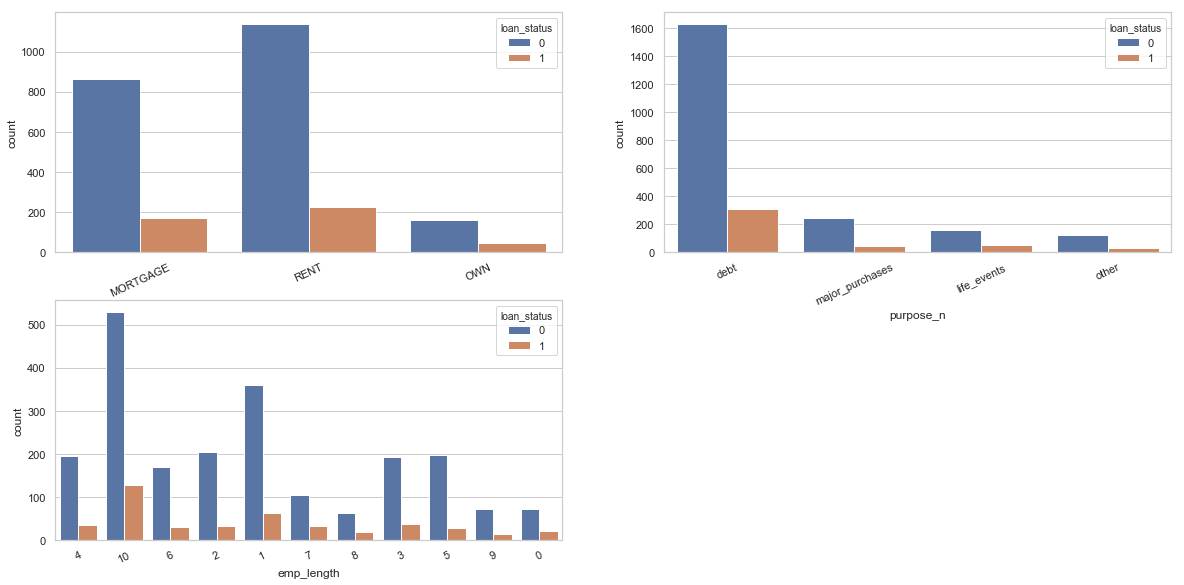

In [111]:
fig = plt.figure(figsize = (20,15))
axes = 320
for i in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data =df , x = i, hue='loan_status')
    plt.xticks(rotation=25)
plt.show()

Customers who has RENTS are taking most loan amounts which causes them to default.

Most of the customers are taking up loans to settle debts.

Default percentage is high in the customers who are having less than 5 years of work experience.

Text(0.5, 1.0, 'Loan Amount by home_ownership')

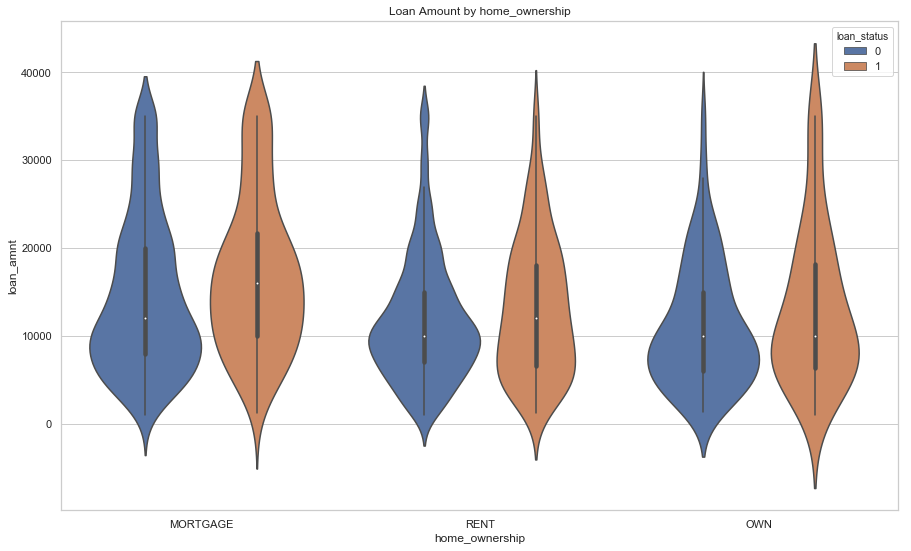

In [112]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)

ax1 = sns.violinplot(x=df['home_ownership'], y=df['loan_amnt'],data=df, hue=df['loan_status'])
ax1.set(xlabel ='home_ownership', ylabel='loan_amnt')
ax1.set_title('Loan Amount by home_ownership')

#RENT, OWN, MORTAGAGE has high distributed values, However the others do not have much variation.

In [113]:
object_columns_df = df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

emp_length                    4
home_ownership         MORTGAGE
verification_status    Verified
addr_state                   GA
purpose_n                  debt
Name: 0, dtype: object


Columns with categorical values:

emp_length - number of years the borrower was employed upon time of application.

home_ownership - home ownership status, can only be 1 of 4 categorical values according to the data dictionary.

verification_status - indicates if income was verified by LendingClub.

addr_state - states.

purpose_n - a category provided by the borrower for the loan request.

In [114]:
cols = ['emp_length','home_ownership','verification_status','addr_state', 'purpose_n']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

emp_length :
10    658
1     422
2     237
3     229
4     228
5     227
6     199
7     136
0      95
9      88
8      82
Name: emp_length, dtype: int64 

home_ownership :
RENT        1362
MORTGAGE    1032
OWN          207
Name: home_ownership, dtype: int64 

verification_status :
Not Verified       940
Source Verified    850
Verified           811
Name: verification_status, dtype: int64 

addr_state :
CA    459
NY    287
FL    216
TX    172
NJ    108
IL     97
VA     94
MI     82
NC     81
GA     80
PA     79
MD     69
AZ     63
WA     62
OH     59
CT     56
MA     49
CO     42
MO     39
MN     37
LA     36
SC     36
WI     31
NV     30
AL     27
OR     27
OK     22
KS     18
NM     17
AR     15
UT     15
HI     13
NH     12
KY     11
WV     11
RI     10
MT      9
AK      7
DC      6
VT      5
DE      5
WY      4
SD      3
Name: addr_state, dtype: int64 

purpose_n :
debt               1939
major_purchases     295
life_events         211
other               156
Name: purpose_n, dtype

In [115]:
#Further, dropping 'state' columns before modeling 
df.drop(['addr_state'], axis = 1, inplace= True)

In [116]:
#converting the type of emp_length column to int64 from string
df['emp_length'] = df['emp_length'].astype('int64')

In [117]:
object_columns_df = df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

home_ownership         MORTGAGE
verification_status    Verified
purpose_n                  debt
Name: 0, dtype: object


In [118]:
nominal_columns = ["home_ownership", "verification_status", "purpose_n"]
dummy_df = pd.get_dummies(df[nominal_columns], drop_first=True) #greating dummies for the above nominal columns and removing first dummy variable to 
#drop the first one to avoid linear dependency between the resulted features since some algorithms may struggle with this issue.
df = pd.concat([df, dummy_df], axis=1) #merging the newly created dummy columns with the working dataset
df = df.drop(nominal_columns, axis=1) #dropping the original nominal columns as they are not required anymore

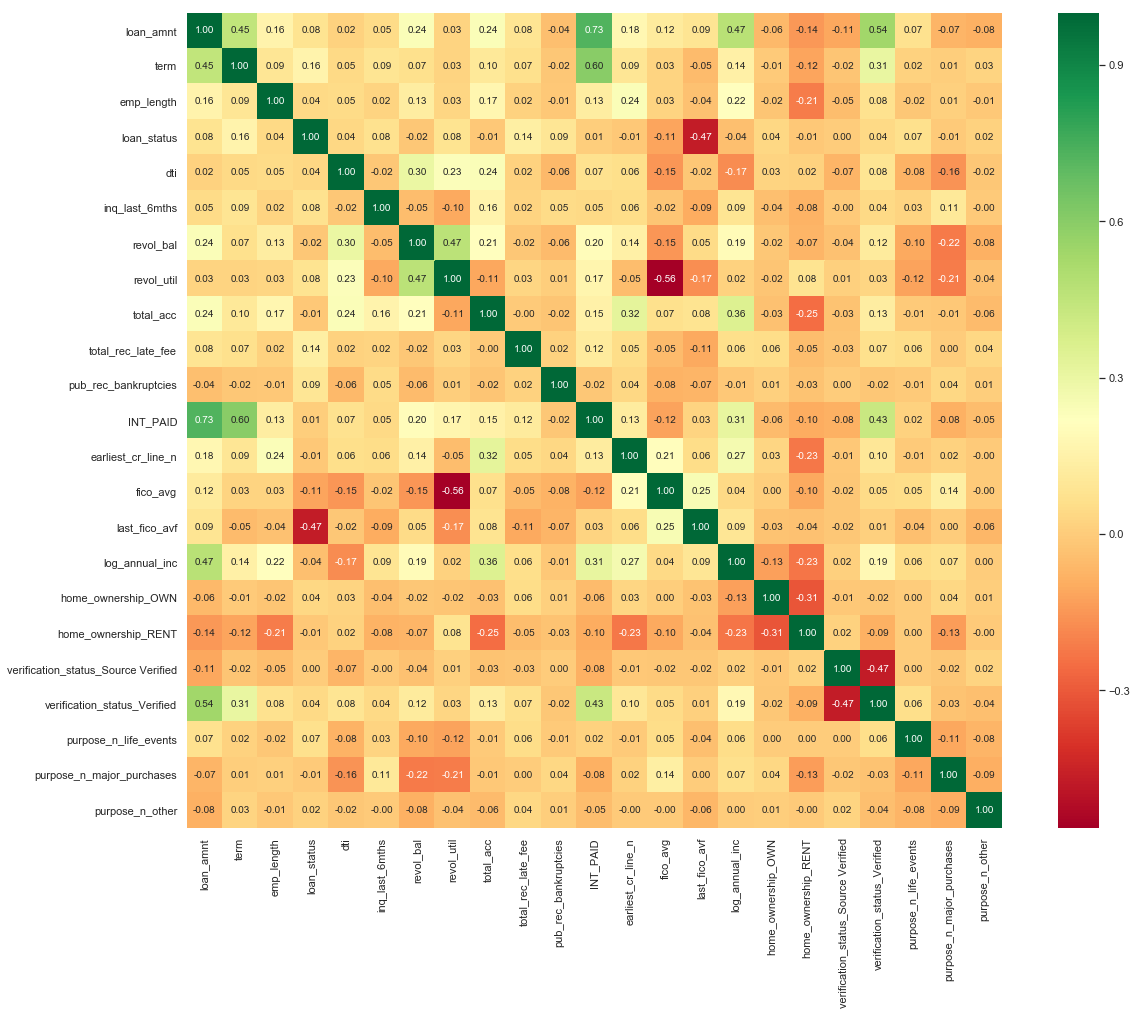

In [119]:
#### Rechecking correlation 
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True, annot=True, fmt = ".2f", cmap = "RdYlGn")

In [120]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 0 to 2600
Data columns (total 23 columns):
loan_amnt                              2601 non-null int64
term                                   2601 non-null int64
emp_length                             2601 non-null int64
loan_status                            2601 non-null int64
dti                                    2601 non-null float64
inq_last_6mths                         2601 non-null int64
revol_bal                              2601 non-null float64
revol_util                             2601 non-null float64
total_acc                              2601 non-null int64
total_rec_late_fee                     2601 non-null float64
pub_rec_bankruptcies                   2601 non-null int64
INT_PAID                               2601 non-null float64
earliest_cr_line_n                     2601 non-null float64
fico_avg                               2601 non-null float64
last_fico_avf                          2601 non-null 

In [121]:
# from google.colab import files
df.to_csv('loan_EDA_Cleaned.csv') 
# files.download('/content/drive/My Drive/Lending_Club/loan_EDA_Cleaned.csv')

# 7. MODEL TRAINING AND VALIDATION
I will be implementing machine learning pipelines consisting of one or more of the following steps, depending on model:

- Dimension reduction using linear discriminant analysis (LDA)
- Data standardization: rescaling to zero mean and unit variance
- The chosen model
- We will evaluate and compare the following models using a cross-validated AUROC score on the training set:

BASELINE: Logistic Regression
1. Logistic regression with SGD training
2. Random forest
3. k-nearest neighbors

I will then perform some hyperparameter tuning for each model to choose the best model, then tune the hyperparameters of the best-performing model.

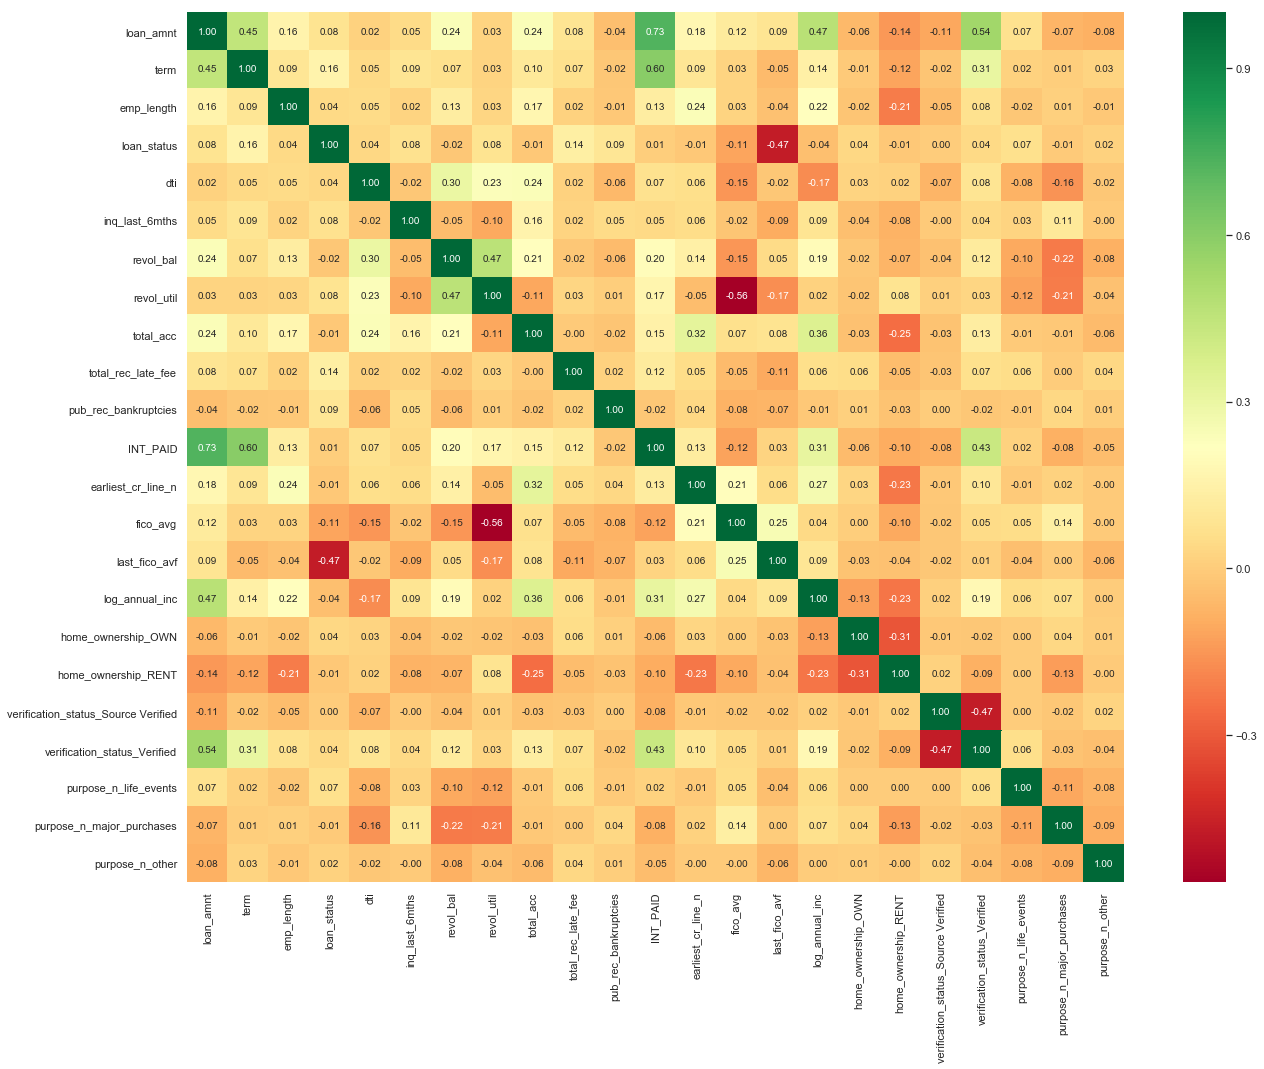

In [122]:
fig, ax = plt.subplots(figsize=(21,16))         
cm_df = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "RdYlGn", ax=ax)

In [123]:
X = df.drop('loan_status', axis=1)
y = df.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [124]:
#OVERSAMPLING-SMOTE
sm= SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [125]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
X_train = pd.DataFrame(X_train, columns=['loan_amnt', 'term', 'emp_length', 'dti', 'inq_last_6mths', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_late_fee', 'pub_rec_bankruptcies',
       'INT_PAID', 'earliest_cr_line_n', 'fico_avg', 'last_fico_avf',
       'log_annual_inc', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_n_life_events', 'purpose_n_major_purchases',
       'purpose_n_other'])

> **BASELINE: Logistic Regression**

In [127]:
#importing necessary libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, f1_score

lrClassifier = LogisticRegression()
lrClassifier.fit(X_train, y_train)
predicted = lrClassifier.predict(X_test)
print("LogisticRegression on Validation: Accuracy Score: %f, F1-score: %f" % 
      (accuracy_score(y_test, predicted), f1_score(y_test, predicted)))

LogisticRegression on Validation: Accuracy Score: 0.838184, F1-score: 0.587537


In [128]:
# generate evaluation metrics
probs = lrClassifier.predict_proba(X_test)
predicted = lrClassifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

# number of correctly classified data points
accuracy_score(y_test, predicted, normalize=False)
# number of incorrectly classifier observations
len(y_test) - accuracy_score(y_test, predicted, normalize=False)

AUC estimate: 0.873
Mean accuracy score: 0.838
[[621  93]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       714
           1       0.52      0.68      0.59       145

    accuracy                           0.84       859
   macro avg       0.72      0.78      0.74       859
weighted avg       0.86      0.84      0.85       859



139

In [129]:
AUC = []
AUC.append(auc)

In [130]:
print(metrics.confusion_matrix(y_test, predicted))
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)
predictions_encoded = np.where(predicted==1,1,0)
metrics.log_loss(y_test_encoded, predictions_encoded)
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

[[621  93]
 [ 46  99]]


,Predicted neg,Predicted pos
Actual neg,621,93
Actual pos,46,99


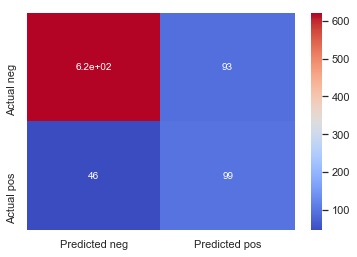

In [131]:
#Confusion matrix viz
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

> To improve the performance of LogisticRegression we can tune its parameters, for example:

> **regularization type:** penalty = {l1, l2, elasticnet}<br />
**regularization strength:** C = {smaller values specify stronger regularization} !!!<br />
**LogisticRegression regularized cost function:** CCost(w) + penalty(w), where w is the weights vector !!!

In [132]:
lrClassifier = LogisticRegression(penalty = 'l2', #calling the object with l2 NORM penalty and alpha value of 0.1
                                  C = 0.1)
lrClassifier.fit(X_train, y_train) #fitting the logistic regression on the training part of the data
predicted = lrClassifier.predict(X_test) #predicting on validation set

print("LogisticRegression on Validation: Accuracy Score: %f, F1-score: %f" %  
      (accuracy_score(y_test, predicted), f1_score(y_test, predicted)))#printing the accuracy and f1 score

LogisticRegression on Validation: Accuracy Score: 0.834692, F1-score: 0.582353


> We see that there is no improvement at all but score decreased due to sparse features which became very low with the regularization. <br />
Trying to improve: Probability threshold calibration.<br /><br />
Besides tuning LogisticRegression hyperparameter values, one other path to improve a classifier's performance is to dig deeper into how the classifier actually assigns class membership.<br /><br />
Binary predictions versus probability predictions. We often use classifier.predict() to examine classifier binary predictions, while in fact the outputs of most classifiers are real-valued, not binary. For most classifiers in sklearn, the method classifier.predict_proba() returns class probabilities as a two-dimensional numpy array of shape (n_samples, n_classes) where the classes are lexicographically ordered.<br /><br />
For our example, let's look at the first 5 predictions we made, in binary format and in real-valued probability format:

How are the predicted probabilities used to decide class membership? On each row of predict_proba output, the probabilities values sum to 1. There are two columns, one for each response class: column 0 - predicted probability that each observation is a member of class 0; column 1 - predicted probability that each observation is a member of class 1. From the predicted probabilities, choose the class with the highest probability.

The key here is that a threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions: class 0, if predicted probability is less than 0.5; class 1, if predicted probability is greater than 0.5.

Can we improve classifier performance by changing the classification threshold? Let's adjust the classification threshold to influence the performance of the classifier.
> Threshold calibration to improve model accuracy

We calculate the accuracy using different values for the classification threshold, and pick the threshold that resulted in the highest accuracy.

Highest Accuracy on Validation: 0.8533178114086146 , Threshold for the highest Accuracy: 0.78


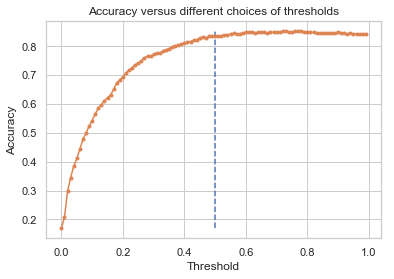

In [133]:
%matplotlib inline 
import numpy as np #importing numpy library
import matplotlib.pyplot as plt #importing matplotlib library for plotting the results

# Calculate the accuracy using different values for the classification threshold, 
# and pick the threshold that resulted in the highest accuracy.
highest_accuracy = 0 #initializing highest_accuracy variable
threshold_highest_accuracy = 0 #initializing threshold_highest_accuracy variable

thresholds = np.arange(0,1,0.01) #
scores = []
for t in thresholds:
    # set threshold to 't' instead of 0.5
    y_val_other = (lrClassifier.predict_proba(X_test)[:,1] >= t).astype(float)
    score = accuracy_score(y_test, y_val_other)
    scores.append(score)
    if(score > highest_accuracy):
        highest_accuracy = score
        threshold_highest_accuracy = t
print("Highest Accuracy on Validation:", highest_accuracy, \
      ", Threshold for the highest Accuracy:", threshold_highest_accuracy)   

# Let's plot the accuracy versus different choices of thresholds
plt.plot([0.5, 0.5], [np.min(scores), np.max(scores)], linestyle='--')
plt.plot(thresholds, scores, marker='.')
plt.title('Accuracy versus different choices of thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

> Threshold calibration to improve model F1 score

Similarly, various choices of classification thresholds would affect the Precision and Recall metrics. Precision and Recall are usually trade offs of each other, so when you can improve both at the same time, your model's overall performance is undeniably improved. To choose a threshold that balances Precision and Recall, we can plot the Precision-Recall curve and pick the point with the highest F1 score.

In [134]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall using different values for the classification threshold
val_predictions_probs = lrClassifier.predict_proba(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, val_predictions_probs[:, 1])

Using the Precision and Recall values from the curve above, we calculate the F1 scores using:

$$\text{F1_score} = \frac{2*(\text{Precision} * \text{Recall})}{(\text{Precision} + \text{Recall})}$$
and pick the threshold that gives the highest F1 score.

/Users/Chile/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


Highest F1 score on Validation: 0.591549295774648 , Threshold for the highest F1 score: 0.46034042166990063


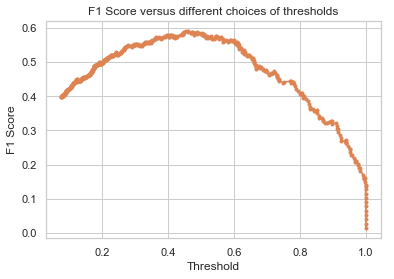

In [135]:
# Calculate the F1 score using different values for the classification threshold, 
# and pick the threshold that resulted in the highest F1 score.
highest_f1 = 0
threshold_highest_f1 = 0

f1_scores = []
for id, threhold in enumerate(thresholds):
    f1_score = 2*precisions[id]*recalls[id]/(precisions[id]+recalls[id])
    f1_scores.append(f1_score)
    if(f1_score > highest_f1):
        highest_f1 = f1_score
        threshold_highest_f1 = threhold
print("Highest F1 score on Validation:", highest_f1, \
      ", Threshold for the highest F1 score:", threshold_highest_f1)

# Let's plot the F1 score versus different choices of thresholds
plt.plot([0.5, 0.5], [np.min(f1_scores), np.max(f1_scores)], linestyle='--')
plt.plot(thresholds, f1_scores, marker='.')
plt.title('F1 Score versus different choices of thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

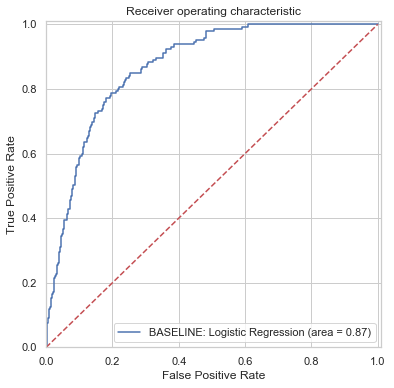

In [136]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lrClassifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='BASELINE: Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [137]:
# CALCULATING THE OPTIMAL THRESHOLD PROBABILITY FROM ROC CURVE
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold: ",optimal_threshold)

Optimal Threshold:  0.27795194458011513


> **7.1 Logistic Regression with SGD training**

> The SGDClassifier estimator implements linear classifiers (SVM, logistic regression, and others) with stochastic gradient descent (SGD) training. A particular linear classifier is chosen through the loss hyperparameter. Because we want to predict the probability of charge-off, we choose logistic regression (a probabilistic classifier) by setting loss = 'log'.

In [138]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

#The machine learning pipeline:
pipeline_sgdlogreg = Pipeline([
    #('imputer', Imputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])
#A small grid of hyperparameters to search over:

param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}
#Create the search grid object:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [139]:
#Conduct the grid search and train the final model on the whole dataset:

grid_sgdlogreg.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=False,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                                                      learning_rate='optimal',
                         

In [140]:
#Mean cross-validated AUROC score of the best model:

grid_sgdlogreg.best_score_

0.9177590273600403

In [141]:
#Best hyperparameters:

grid_sgdlogreg.best_params_

{'model__alpha': 0.01, 'model__penalty': 'l2'}

In [142]:
probs = grid_sgdlogreg.predict_proba(X_test)
predicted = grid_sgdlogreg.predict(X_test)
#print("knnClassifier on Validation: Accuracy Score: %f, F1-score: %f" % 
      #(accuracy_score(y_val, predicted), f1_score(y_val, predicted)))
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

AUC estimate: 0.867
Mean accuracy score: 0.835
[[621  93]
 [ 49  96]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       714
           1       0.51      0.66      0.57       145

    accuracy                           0.83       859
   macro avg       0.72      0.77      0.74       859
weighted avg       0.86      0.83      0.84       859



In [143]:
AUC.append(auc)

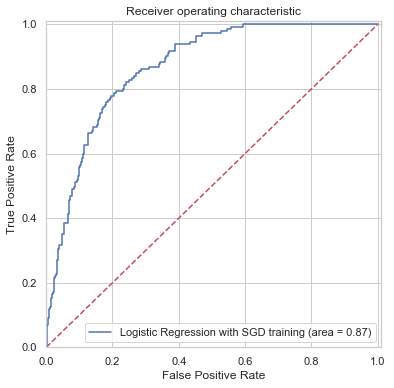

In [144]:
# ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, grid_sgdlogreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr1, tpr1, label='Logistic Regression with SGD training (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

> **7.2 K-Nearest Neighbors**

> Next we try k-nearest neighbors. We need to reduce the number of variables to 10 or fewer (reference) for kNN to perform well. We'll use LDA for dimension reduction. The number of component variables to keep is a hyperparameter.

In [145]:
pipeline_knn = Pipeline([
    #('scaler', StandardScaler(copy=False)),
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))
])


param_grid_knn = {
    'lda__n_components': [3, 9], # Number of LDA components to keep
    'model__n_neighbors': [5, 25, 125] # The 'k' in k-nearest neighbors
}

grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [146]:
%%time
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 290 ms, sys: 44.6 ms, total: 334 ms
Wall time: 1.47 s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished
/Users/Chile/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/Chile/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lda',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                                                   shrinkage=None,
                                                                   solver='svd',
                                                                   store_covariance=False,
                                                                   tol=0.0001)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
     

In [147]:
#Mean cross-validated AUROC score of the best model:
grid_knn.best_score_

0.9138586083450415

In [148]:
#Best hyperparameters:
grid_knn.best_params_

{'lda__n_components': 3, 'model__n_neighbors': 125}

In [149]:
# generate evaluation metrics
probs = grid_knn.predict_proba(X_test)
predicted = grid_knn.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

# number of correctly classified data points
accuracy_score(y_test, predicted, normalize=False)
# number of incorrectly classifier observations
len(y_test) - accuracy_score(y_test, predicted, normalize=False)

AUC estimate: 0.853
Mean accuracy score: 0.827
[[618  96]
 [ 53  92]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       714
           1       0.49      0.63      0.55       145

    accuracy                           0.83       859
   macro avg       0.71      0.75      0.72       859
weighted avg       0.85      0.83      0.84       859



149

In [150]:
AUC.append(auc)

We are getting ROC of 82% with K = 3 and with KNN

That's slight reduction from what we got from our first algorithm.

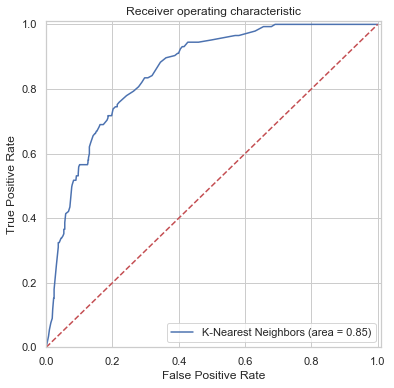

In [151]:
# ROC curve

fpr2, tpr2, thresholds2 = roc_curve(y_test, grid_knn.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr2, tpr2, label='K-Nearest Neighbors (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

[[618  96]
 [ 53  92]]
            Predicted neg  Predicted pos
Actual neg            618             96
Actual pos             53             92


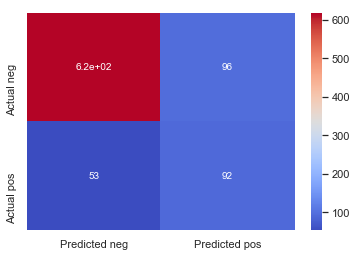

In [152]:
print(metrics.confusion_matrix(y_test, predicted))
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)
predictions_encoded = np.where(predicted==1,1,0)
metrics.log_loss(y_test_encoded, predictions_encoded)
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df)

#Confusion matrix viz
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

> Improvement Ideas:

The performance improved with this model, but there is still a lot of room for improvement. We can:

- Utilize the text fields to improve our performance (Bag of Words Representation) (done)
- Try target enconding for categorical variables (done)
- Feature selection: Not all variables may be important, we can achieve higher performance by selecting a subset of our vairables.(yet to try)
- Try ensemble models such as Random Forests (below)

> **7.3 Decision Tree**

In [153]:
%%time
param_grid={'max_depth': [5, 10, 20],
            'min_samples_leaf': [5, 10, 15],
            'min_samples_split': [2, 5, 15, 25] 
           }

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, # Base model
                           param_grid, # Parameters to try
                           cv = 5, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors 
                          )

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 281 ms, sys: 16.3 ms, total: 297 ms
Wall time: 2.17 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.1s finished


In [154]:
grid_search.best_params_ #{'max_depth': 50, 'min_samples_leaf': 5, 'min_samples_split': 5}

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}

In [155]:
# generate evaluation metrics
probs = grid_search.predict_proba(X_test)
# Let's get the input and output data for testing the classifier
predicted = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

# number of correctly classified data points
accuracy_score(y_test, predicted, normalize=False)
# number of incorrectly classifier observations
len(y_test) - accuracy_score(y_test, predicted, normalize=False)

AUC estimate: 0.809
Mean accuracy score: 0.802
[[604 110]
 [ 60  85]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       714
           1       0.44      0.59      0.50       145

    accuracy                           0.80       859
   macro avg       0.67      0.72      0.69       859
weighted avg       0.83      0.80      0.81       859



170

In [156]:
AUC.append(auc)

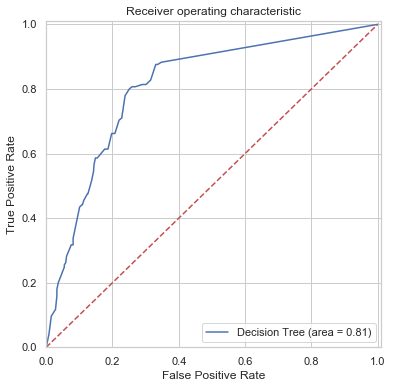

In [157]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr3, tpr3, label='Decision Tree (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

[[604 110]
 [ 60  85]]
            Predicted neg  Predicted pos
Actual neg            604            110
Actual pos             60             85


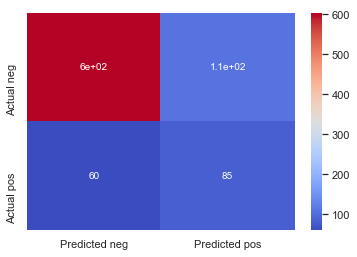

In [158]:
print(metrics.confusion_matrix(y_test, predicted))
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)
predictions_encoded = np.where(predicted==1,1,0)
metrics.log_loss(y_test_encoded, predictions_encoded)
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df)

#Confusion matrix viz
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

>**7.4 Random Forest Classifier (Winner)**

In [159]:
#Next we train a random forest model. Data standardization is not necessary for a random forest.

pipeline_rfc = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

#The random forest takes very long to train, so we don't test different hyperparameter choices. We'll still use GridSearchCV for the sake of consistency.

param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

#The AUROC will always improve (with decreasing gains) as the number of estimators increases, but it's not necessarily worth the extra training time and model complexity.

grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [160]:
%%time
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


CPU times: user 334 ms, sys: 25.1 ms, total: 359 ms
Wall time: 1.04 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [161]:
#Mean cross-validated AUROC score of the random forest:

grid_rfc.best_score_

0.9739059678982243

In [162]:
grid_rfc.best_params_

{'model__n_estimators': 50}

In [163]:
%%time
rf = RandomForestClassifier(n_estimators=50, max_depth=3, max_features='log2', oob_score=True,  random_state=0)
rf.fit(X_train, y_train)

CPU times: user 142 ms, sys: 3.58 ms, total: 146 ms
Wall time: 173 ms


In [164]:
# generate evaluation metrics

probs = rf.predict_proba(X_test)
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

print(f'AUC estimate: {auc:.3}')
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

AUC estimate: 0.854
Out-of-bag score estimate: 0.848
Mean accuracy score: 0.795
[[570 144]
 [ 32 113]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       714
           1       0.44      0.78      0.56       145

    accuracy                           0.80       859
   macro avg       0.69      0.79      0.71       859
weighted avg       0.86      0.80      0.81       859



In [165]:
AUC.append(auc)

[[570 144]
 [ 32 113]]
            Predicted neg  Predicted pos
Actual neg            570            144
Actual pos             32            113


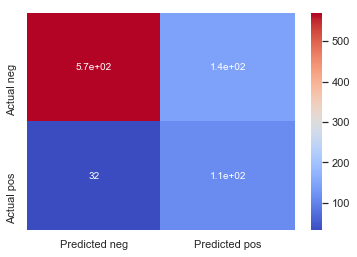

In [166]:
print(metrics.confusion_matrix(y_test, predicted))
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)
predictions_encoded = np.where(predicted==1,1,0)
metrics.log_loss(y_test_encoded, predictions_encoded)
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df)

#Confusion matrix viz
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

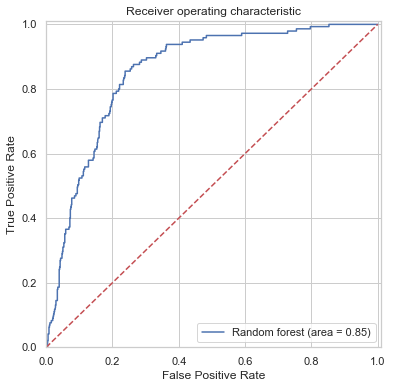

In [167]:
# ROC curve

fpr4, tpr4, thresholds4 = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr4, tpr4, label='Random forest (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [168]:
#variable importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [169]:
X_train.shape[1]

22

Feature ranking:
1. feature 13 (0.443414)
2. feature 8 (0.147633)
3. feature 1 (0.081555)
4. feature 17 (0.065167)
5. feature 16 (0.063812)
6. feature 12 (0.051860)
7. feature 0 (0.019324)
8. feature 20 (0.017749)
9. feature 2 (0.016669)
10. feature 14 (0.016095)
11. feature 6 (0.014063)
12. feature 3 (0.012687)
13. feature 10 (0.012617)
14. feature 18 (0.008558)
15. feature 11 (0.007822)
16. feature 5 (0.007807)
17. feature 7 (0.004807)
18. feature 15 (0.004542)
19. feature 21 (0.002233)
20. feature 4 (0.001466)
21. feature 9 (0.000121)
22. feature 19 (0.000000)


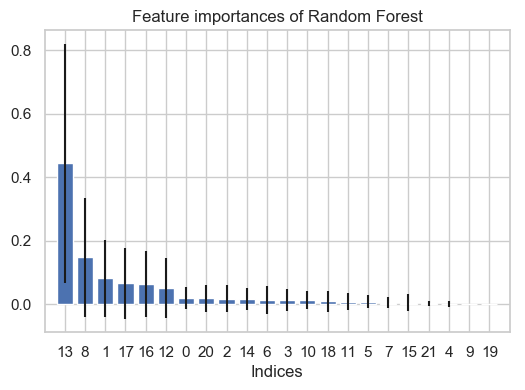

In [170]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(dpi=100)
plt.title("Feature importances of Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],
        yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Indices')
plt.xlim([-1, X_train.shape[1]])
# plt.savefig('features.jpg')
plt.show()

In [171]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 22 columns):
loan_amnt                              2894 non-null float64
term                                   2894 non-null float64
emp_length                             2894 non-null float64
dti                                    2894 non-null float64
inq_last_6mths                         2894 non-null float64
revol_bal                              2894 non-null float64
revol_util                             2894 non-null float64
total_acc                              2894 non-null float64
total_rec_late_fee                     2894 non-null float64
pub_rec_bankruptcies                   2894 non-null float64
INT_PAID                               2894 non-null float64
earliest_cr_line_n                     2894 non-null float64
fico_avg                               2894 non-null float64
last_fico_avf                          2894 non-null float64
log_annual_inc                         

In [172]:
feature_list_RF = []
for Class, score in zip(X_train, rf.feature_importances_):
    feature_list_RF.append((score, Class))

>**7.5 Extra Tree Classifier**

In [173]:

ex_tree = ExtraTreesClassifier(n_estimators=200, n_jobs=-1, max_depth=3, random_state=666)
ex_tree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=3, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=666, verbose=0,
                     warm_start=False)

In [174]:
ex_tree_pred = ex_tree.predict(X_test)
ex_tree_prob = ex_tree.predict_proba(X_test)
Acc_EX = accuracy_score(y_test, ex_tree_pred)
auc = metrics.roc_auc_score(y_test, ex_tree_prob[:,1])
print("Extra Tree ACCURACY SCORE : ",Acc_EX)

Extra Tree ACCURACY SCORE :  0.7660069848661234


In [175]:
# generate evaluation metrics

probs = ex_tree.predict_proba(X_test)
predicted = ex_tree.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

print(f'AUC estimate: {auc:.3}')
# print(f'Out-of-bag score estimate: {ex_tree.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

AUC estimate: 0.728
Mean accuracy score: 0.766
[[593 121]
 [ 80  65]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       714
           1       0.35      0.45      0.39       145

    accuracy                           0.77       859
   macro avg       0.62      0.64      0.62       859
weighted avg       0.79      0.77      0.78       859



In [176]:
AUC.append(auc)

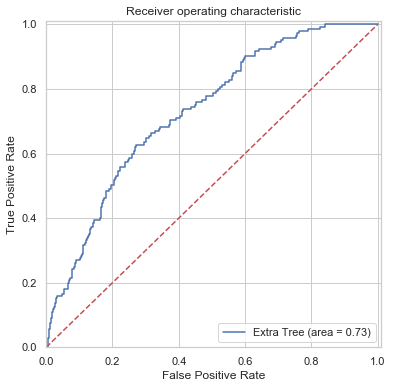

In [177]:
# ROC curve

fpr5, tpr5, thresholds5 = roc_curve(y_test, ex_tree.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr5, tpr5, label='Extra Tree (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [178]:
confusion_mat_ex_tree = confusion_matrix(y_test, ex_tree_pred)
confusion_ex_tree = pd.DataFrame(confusion_mat_ex_tree, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_ex_tree

,Predicted neg,Predicted pos
Actual neg,593,121
Actual pos,80,65


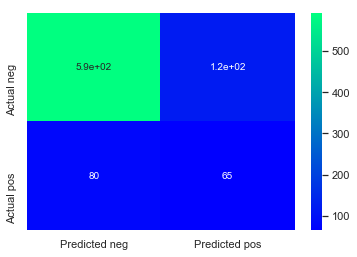

In [179]:
_=sns.heatmap(confusion_ex_tree, cmap="winter", annot=True)

In [180]:
feature_list_EX = []
for Class, score in zip(X_train, ex_tree.feature_importances_):
    feature_list_EX.append((score, Class))

>**7.6 Neural Network with MLP Classifier**

In [181]:
%%time

nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train, y_train)

CPU times: user 27.1 ms, sys: 2.42 ms, total: 29.5 ms
Wall time: 46.7 ms


In [182]:
probs = nn.predict_proba(X_test)
predicted = nn.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

AUC estimate: 0.615
Mean accuracy score: 0.778
[[624  90]
 [101  44]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       714
           1       0.33      0.30      0.32       145

    accuracy                           0.78       859
   macro avg       0.59      0.59      0.59       859
weighted avg       0.77      0.78      0.77       859



In [183]:
AUC.append(auc)

[[624  90]
 [101  44]]
            Predicted neg  Predicted pos
Actual neg            624             90
Actual pos            101             44


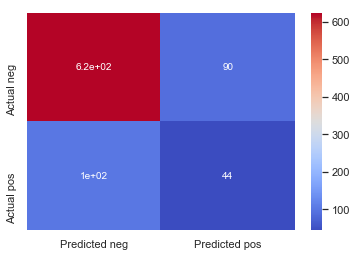

In [184]:
print(metrics.confusion_matrix(y_test, predicted))
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)
predictions_encoded = np.where(predicted==1,1,0)
metrics.log_loss(y_test_encoded, predictions_encoded)
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df)

#Confusion matrix viz
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

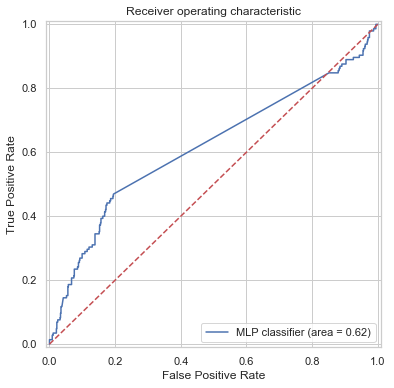

In [185]:
# ROC curve

fpr6, tpr6, thresholds6 = roc_curve(y_test, nn.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr6, tpr6, label='MLP classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

>**7.7 Naive Bayes**

In [186]:
%%time
gnb = GaussianNB()
gnb.fit(X_train, y_train)

CPU times: user 6.85 ms, sys: 1.95 ms, total: 8.8 ms
Wall time: 9.4 ms


In [187]:
probs = gnb.predict_proba(X_test)
predicted = gnb.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

AUC estimate: 0.617
Mean accuracy score: 0.693
[[522 192]
 [ 72  73]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       714
           1       0.28      0.50      0.36       145

    accuracy                           0.69       859
   macro avg       0.58      0.62      0.58       859
weighted avg       0.78      0.69      0.72       859



In [188]:
AUC.append(auc)

[[522 192]
 [ 72  73]]
            Predicted neg  Predicted pos
Actual neg            522            192
Actual pos             72             73


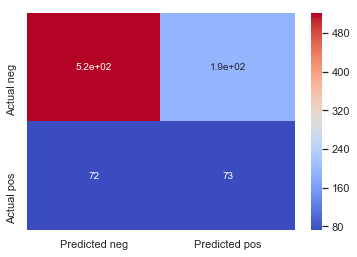

In [189]:
print(metrics.confusion_matrix(y_test, predicted))
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)
predictions_encoded = np.where(predicted==1,1,0)
metrics.log_loss(y_test_encoded, predictions_encoded)
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df)

#Confusion matrix viz
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

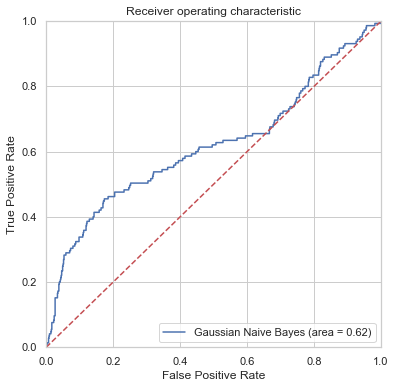

In [190]:

fpr7, tpr7, thresholds7 = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr7, tpr7, label='Gaussian Naive Bayes (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

>**7.8 Linear discriminant analysis (separate from KNN)**

In [191]:
%time
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 10 µs


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [192]:
probs = lda.predict_proba(X_test)
predicted = lda.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

AUC estimate: 0.856
Mean accuracy score: 0.823
[[624  90]
 [ 62  83]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       714
           1       0.48      0.57      0.52       145

    accuracy                           0.82       859
   macro avg       0.69      0.72      0.71       859
weighted avg       0.84      0.82      0.83       859



In [193]:
AUC.append(auc)

[[624  90]
 [ 62  83]]
            Predicted neg  Predicted pos
Actual neg            624             90
Actual pos             62             83


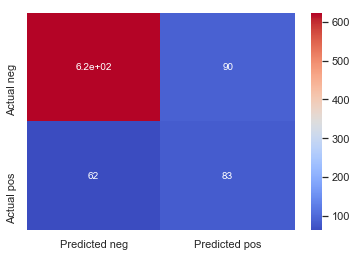

In [194]:
print(metrics.confusion_matrix(y_test, predicted))
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)
predictions_encoded = np.where(predicted==1,1,0)
metrics.log_loss(y_test_encoded, predictions_encoded)
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df)

#Confusion matrix viz
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

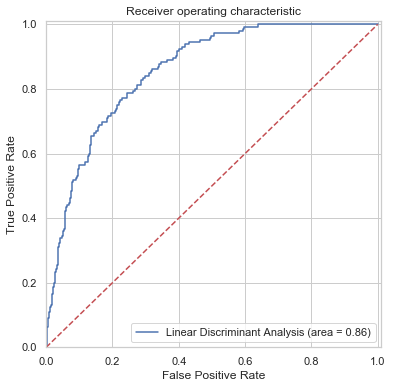

In [195]:
# ROC curve

fpr8, tpr8, thresholds8 = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr8, tpr8, label='Linear Discriminant Analysis (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

>**7.9 Gradient boosting**

Ensemble methods can be defined as combining several different models (base learners) into final model (meta learner) to reduce the generalization error.

It relies on the assumption that each model would look at a different aspect of the data which yield to capturing part of the truth. Combining good performing models the were trained independently will capture more of the truth than a single model. Therefore, this would result in more accurate predictions and lower generalization errors.

In [196]:
%%time
gradboost = GradientBoostingClassifier(n_estimators=200,max_depth=3)
gradboost.fit(X_train, y_train)

CPU times: user 1.56 s, sys: 13.5 ms, total: 1.57 s
Wall time: 1.57 s


In [197]:
probs = gradboost.predict_proba(X_test)
predicted = gradboost.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

AUC estimate: 0.884
Mean accuracy score: 0.845
[[642  72]
 [ 61  84]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       714
           1       0.54      0.58      0.56       145

    accuracy                           0.85       859
   macro avg       0.73      0.74      0.73       859
weighted avg       0.85      0.85      0.85       859



In [198]:
AUC.append(auc)

[[642  72]
 [ 61  84]]
            Predicted neg  Predicted pos
Actual neg            642             72
Actual pos             61             84


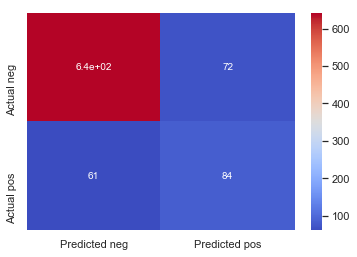

In [199]:
print(metrics.confusion_matrix(y_test, predicted))
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)
predictions_encoded = np.where(predicted==1,1,0)
metrics.log_loss(y_test_encoded, predictions_encoded)
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df)

#Confusion matrix viz
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

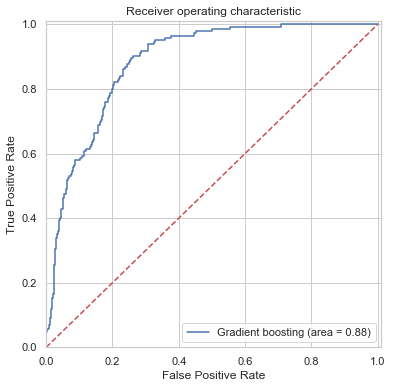

In [200]:
# ROC curve

fpr9, tpr9, thresholds9 = roc_curve(y_test, gradboost.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr9, tpr9, label='Gradient boosting (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [201]:
gradboost.feature_importances_

array([0.04431752, 0.02680512, 0.0169166 , 0.02000731, 0.00205785,
       0.01979088, 0.01366997, 0.00854144, 0.03505496, 0.00091383,
       0.03846567, 0.01746605, 0.02098866, 0.64545803, 0.01736263,
       0.00532608, 0.01851826, 0.01990154, 0.01490921, 0.00174371,
       0.00583989, 0.00594481])

>**7.10 Bagging Classifier**

In [202]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [203]:
%%time
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

CPU times: user 45 µs, sys: 9 µs, total: 54 µs
Wall time: 58.9 µs


In [204]:
%%time
clf.fit(X_train,y_train)

CPU times: user 42 ms, sys: 6.06 ms, total: 48.1 ms
Wall time: 214 ms


/Users/Chile/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Chile/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [205]:
clf.oob_score_

0.8818244644091223

In [206]:
clf.score(X_test,y_test)

0.8207217694994179

In [207]:
# Feature Importance
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_

In [208]:
print(clf.estimators_[0]) #first tree model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1859118377, splitter='best')


In [209]:
print(clf.estimators_[0].feature_importances_)

[0.04435134 0.01161909 0.00684575 0.05351691 0.01136628 0.03551086
 0.02933351 0.0344375  0.01646625 0.         0.05402423 0.03750807
 0.05085023 0.52288005 0.03556862 0.00127629 0.01980712 0.00561145
 0.00234726 0.00280371 0.01108621 0.01278924]


In [210]:
# We can extract feature importance from each tree then take a mean for all trees
import numpy as np
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)
imp

array([0.04726647, 0.0150516 , 0.01982719, 0.0449685 , 0.0116162 ,
       0.03594141, 0.04165371, 0.02955568, 0.01819691, 0.00063812,
       0.04971186, 0.03419099, 0.03601462, 0.52313826, 0.03249308,
       0.00443799, 0.01858836, 0.01131126, 0.00901232, 0.00381148,
       0.00712801, 0.00544597])

In [211]:
probs = clf.predict_proba(X_test)
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

AUC estimate: 0.854
Mean accuracy score: 0.821
[[632  82]
 [ 72  73]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       714
           1       0.47      0.50      0.49       145

    accuracy                           0.82       859
   macro avg       0.68      0.69      0.69       859
weighted avg       0.83      0.82      0.82       859



In [212]:
AUC.append(auc)

[[632  82]
 [ 72  73]]
            Predicted neg  Predicted pos
Actual neg            632             82
Actual pos             72             73


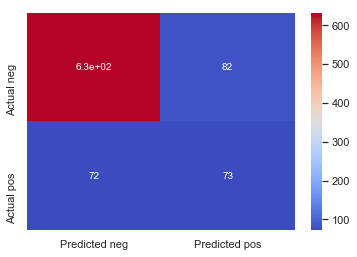

In [213]:
print(metrics.confusion_matrix(y_test, predicted))
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)
predictions_encoded = np.where(predicted==1,1,0)
metrics.log_loss(y_test_encoded, predictions_encoded)
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df)

#Confusion matrix viz
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

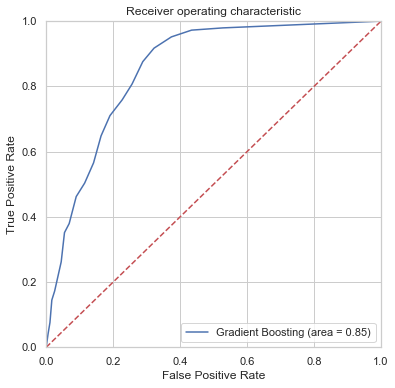

In [214]:
# ROC curve

fpr10, tpr10, thresholds10 = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr10, tpr10, label='Gradient Boosting (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

>**7.11 Multi Layer ANN - Keras**

In [215]:
np.random.seed(777)

In [216]:
X_train.shape

(2894, 22)

In [217]:
%%time
# create model
model = Sequential()
model.add(Dense(22, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X_test)
y_rounded = [round(x[0]) for x in predictions]
scores_test = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

accuracy_score(y_test, y_rounded)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2894/2894 [==============================] - 2s 750us/step - loss: 0.5976 - accuracy: 0.6907
Epoch 2/10
2894/2894 [==============================] - 1s 421us/step - loss: 0.3948 - accuracy: 0.8341
Epoch 3/10
2894/2894 [==============================] - 1s 369us/step - loss: 0.3237 - accuracy: 0.8639
Epoch 4/10
2894/2894 [==============================] - 1s 390us/step - loss: 0.2985 - accuracy: 0.8770
Epoch 5/10
2894/2894 [==============================] - 1s 380us/step - loss: 0.2814 - accuracy: 0.8836
Epoch 6/10
2894/2894 [==============================] - 1s 380us/step - loss: 0.2697 - accuracy: 0.8918
Epoch 7/10
2894/2894 [==============================] - 1s 406us/step - loss: 0.2585 - accuracy: 0.8946
Epoch 8/10
2894/2894 [==============================] - 1s 389us/step - loss: 0.2490 - accuracy: 0.8991
Epoch 9/10
2894/2894 [==========================

In [218]:
probs = model.predict_proba(X_test)
predicted = model.predict(X_test)
auc = metrics.roc_auc_score(y_test, probs)
accuracy = accuracy_score(y_test, predicted.round(),normalize=False)

In [219]:
AUC.append(auc)

In [220]:
print(metrics.classification_report(y_test, predicted.round()))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       714
           1       0.50      0.60      0.55       145

    accuracy                           0.83       859
   macro avg       0.71      0.74      0.72       859
weighted avg       0.85      0.83      0.84       859



In [221]:
# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy/859}')

AUC estimate: 0.875
Mean accuracy score: 0.8323632130384168


In [222]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted.round())

cm

array([[628,  86],
       [ 58,  87]])

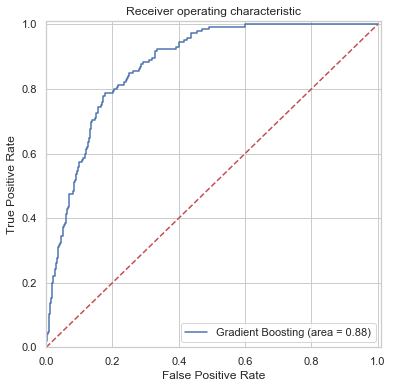

In [223]:
# ROC curve

fpr11, tpr11, thresholds10 = roc_curve(y_test, model.predict_proba(X_test))
plt.figure(figsize=(6,6))
plt.plot(fpr11, tpr11, label='Gradient Boosting (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

>**7.12 Single Layer ANN**

In [224]:
# Initialising the ANN
loans_predictor = Sequential() 
# creating object of Sequential class

In [225]:
# Adding the input layer and the hidden layer
loans_predictor.add(Dense(input_dim=X_train.shape[1], activation="relu", kernel_initializer="uniform", units=5))

In [226]:
# Adding the output layer
loans_predictor.add(Dense(activation = 'sigmoid', kernel_initializer = "uniform", units = 1))

In [227]:
# Compiling the ANN
loans_predictor.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [228]:
%%time
# Fitting the ANN to the Training set

loans_predictor.fit(X_train, y_train, batch_size = 10, nb_epoch = 20)

/Users/Chile/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
2894/2894 [==============================] - 2s 668us/step - loss: 0.6244 - accuracy: 0.8006
Epoch 2/20
2894/2894 [==============================] - 1s 370us/step - loss: 0.4294 - accuracy: 0.8476
Epoch 3/20
2894/2894 [==============================] - 1s 349us/step - loss: 0.3579 - accuracy: 0.8614
Epoch 4/20
2894/2894 [==============================] - 1s 443us/step - loss: 0.3344 - accuracy: 0.8697
Epoch 5/20
2894/2894 [==============================] - 1s 382us/step - loss: 0.3233 - accuracy: 0.8742
Epoch 6/20
2894/2894 [==============================] - 1s 346us/step - loss: 0.3164 - accuracy: 0.8746
Epoch 7/20
2894/2894 [==============================] - 1s 367us/step - loss: 0.3121 - accuracy: 0.8770
Epoch 8/20
2894/2894 [==============================] - 1s 363us/step - loss: 0.3079 - accuracy: 0.8742
Epoch 9/20
2894/2894 [==============================] - 1s 435us/step - loss: 0.3050 - accuracy: 0.8756
Epoch 10/20
2894/2894 [==============================] - 1s 362u

In [229]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = loans_predictor.predict(X_test)

In [230]:

y_pred = (y_pred > 0.5)

In [231]:
probs = loans_predictor.predict_proba(X_test)
predicted = loans_predictor.predict(X_test)
accuracy = accuracy_score(y_test, predicted.round(),normalize=False)
auc = metrics.roc_auc_score(y_test, probs)

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy/859}')

AUC estimate: 0.881
Mean accuracy score: 0.8346915017462165


In [232]:
AUC.append(auc)

In [233]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[604, 110],
       [ 32, 113]])

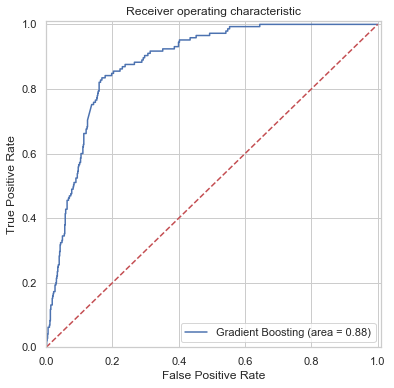

In [234]:
# ROC curve

fpr12, tpr12, thresholds12 = roc_curve(y_test, loans_predictor.predict_proba(X_test))
plt.figure(figsize=(6,6))
plt.plot(fpr12, tpr12, label='Gradient Boosting (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [235]:
print(metrics.classification_report(y_test, predicted.round()))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89       714
           1       0.51      0.78      0.61       145

    accuracy                           0.83       859
   macro avg       0.73      0.81      0.75       859
weighted avg       0.87      0.83      0.85       859



# 8. EVALUATION

Model|Accuary|F1-score|AUC|Recall|Precision|True Positive Num|False Positive Num
---|---|---|---|---|---|---|---
BASELINE|0.84|0.59|0.87|0.68|0.52|99|46
7.1 Logistic Regression with SGD training|0.84|0.57|0.87|0.66|0.51|96|49
7.2 K-Nearest Neighbors|0.83|0.55|0.85|0.63|0.49|92|53
7.3 Decision Tree|0.80|0.50|0.81|0.59|0.43|85|60
7.4 Random Forest|0.80|0.56|0.85|**0.78**|0.44|113|32
7.5 Extra Tree Classifier|0.77|0.39|0.73|0.45|0.35|65|80
7.6 Neural Network with MLP Classifier|0.78|0.32|0.62|0.30|0.33|44|101
7.7 Naive Bayes Classifier|0.70|0.36|0.62|0.50|0.28|73|72
7.8 Linear discriminant analysis (separate from KNN)|0.82|0.52|0.86|0.57|0.48|83|62
7.9 Gradient boosting|0.85|0.56|0.88|0.58|0.54|84|61
7.10 Bagging Classifier|0.82|0.49|0.85|0.50|0.47|73|72
7.11 Multi Layer ANN|0.85|0.60|0.85|0.67|0.54|97|48
7.12 Single Layer ANN|0.87|0.61|0.88|0.76|0.52|110|35

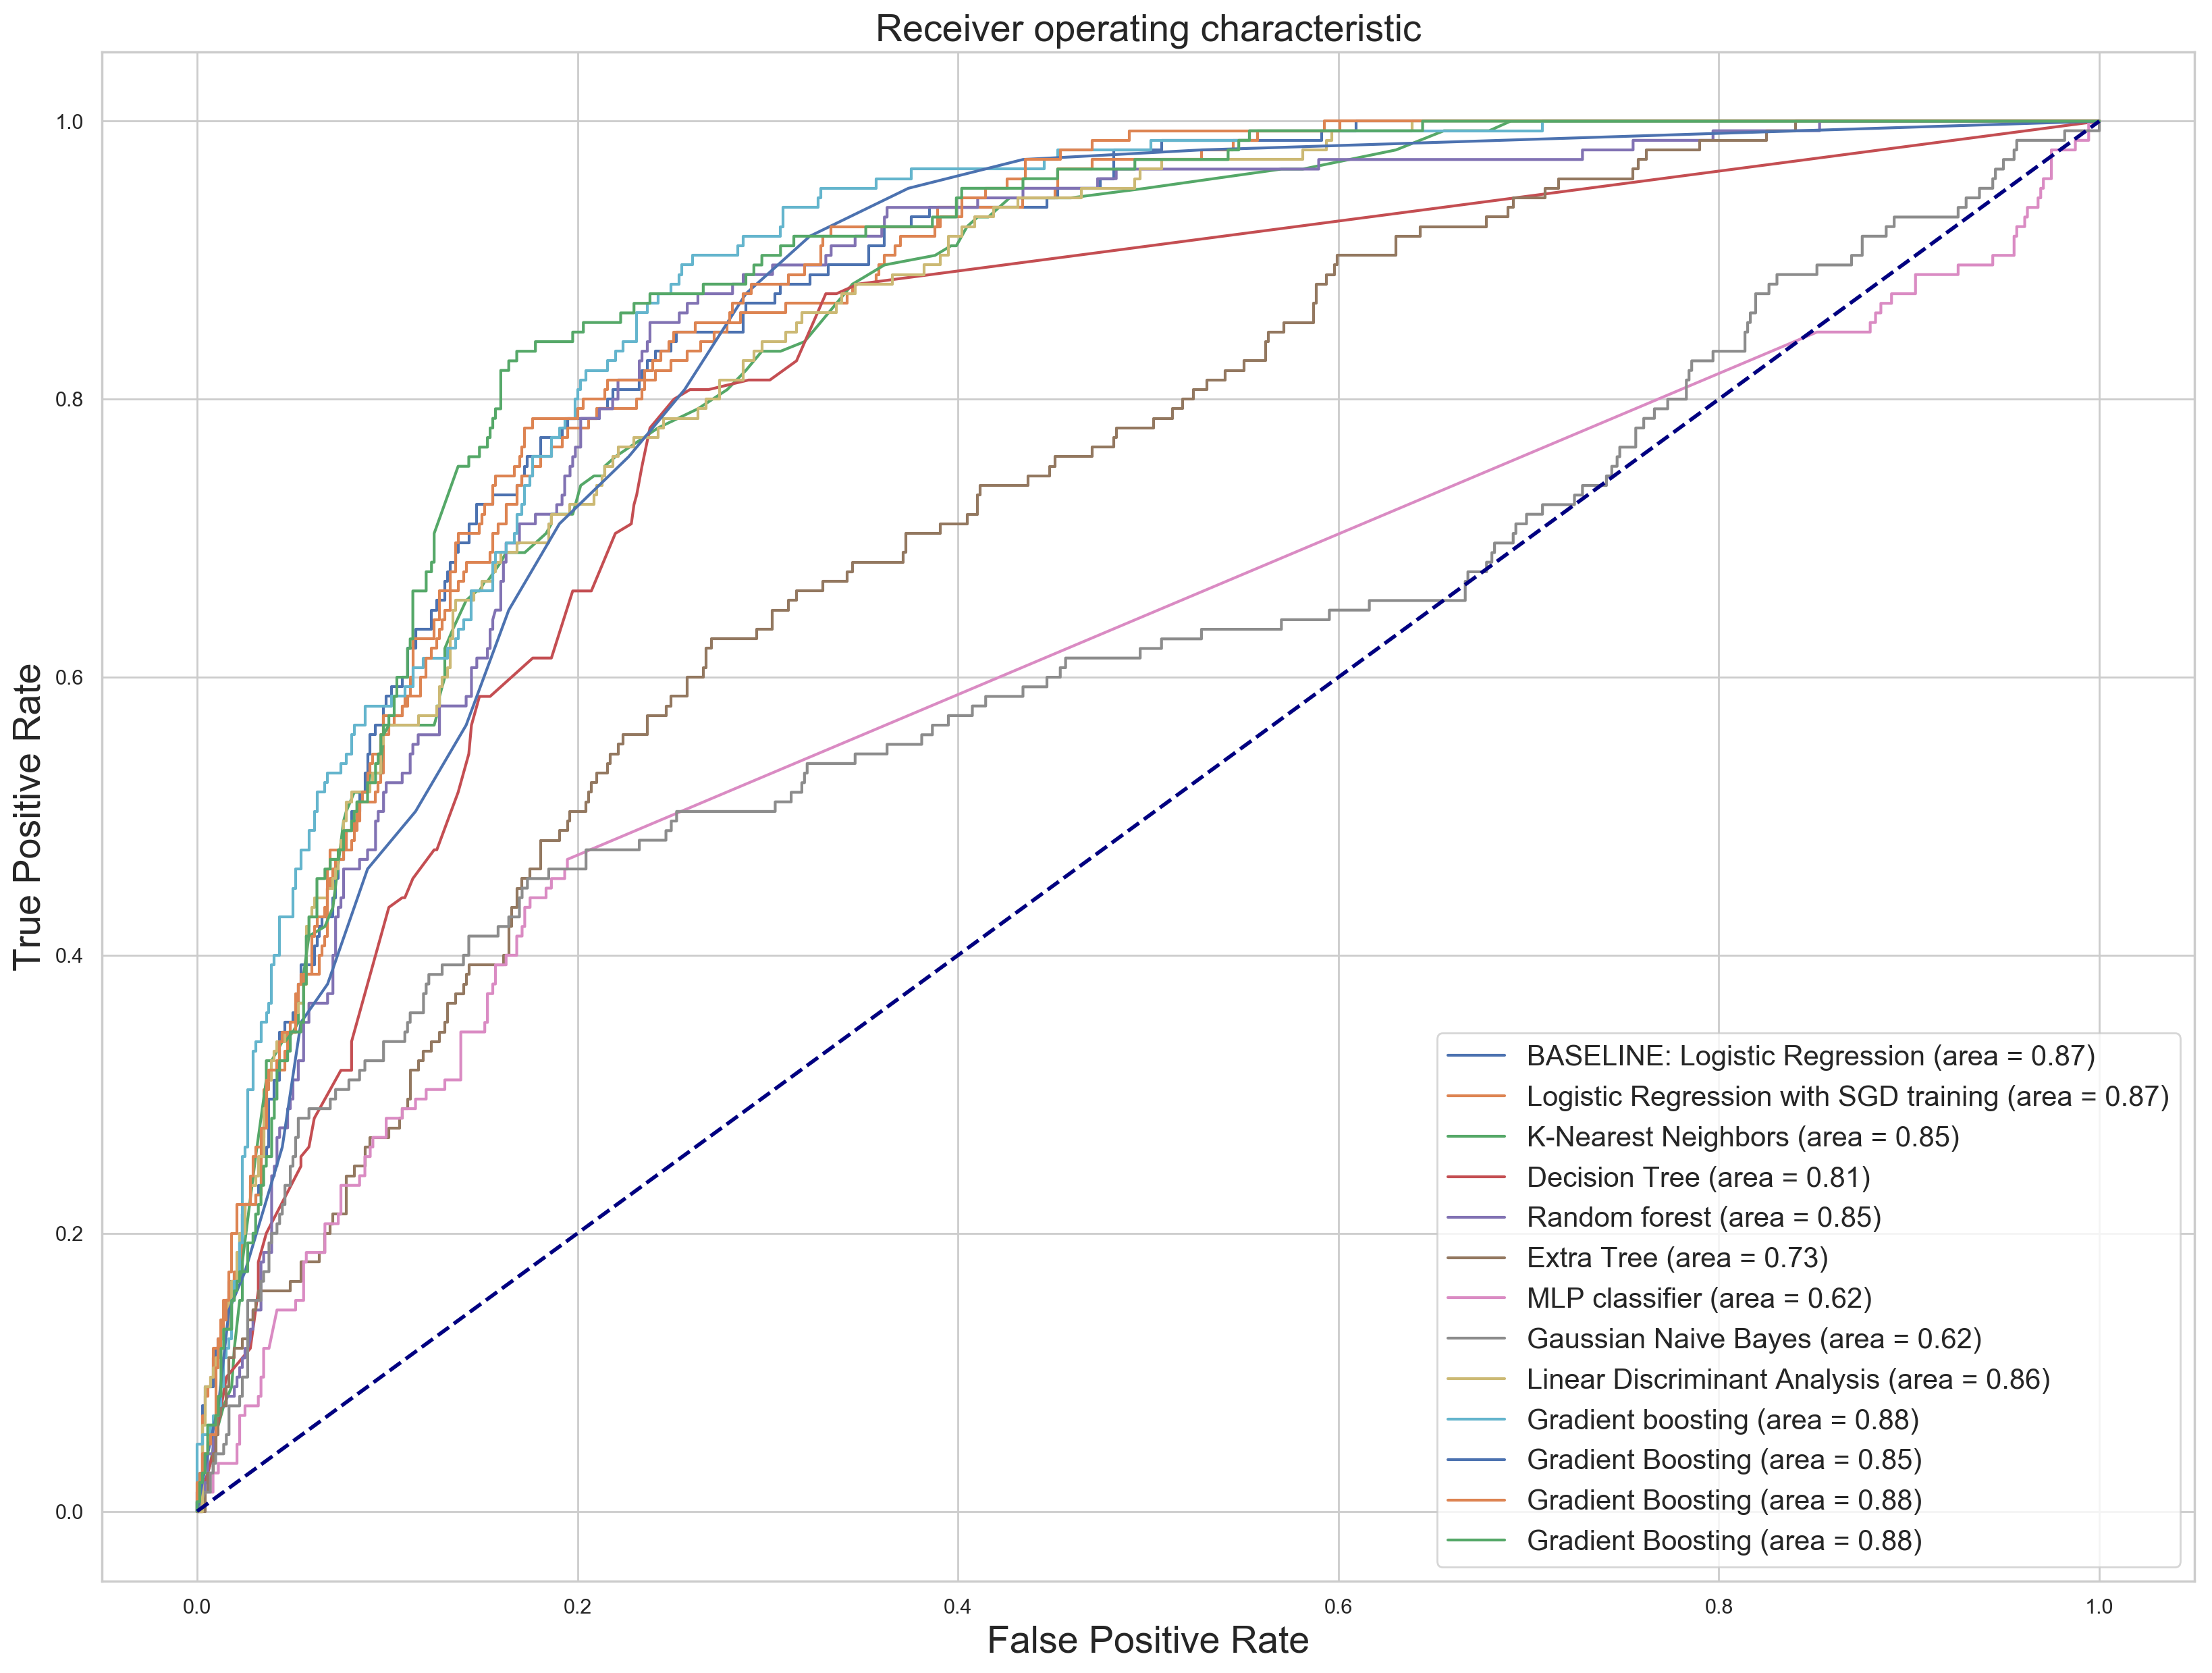

In [236]:
plt.figure(figsize=(20,15), dpi=200)
fpr, tpr, thresholds = roc_curve(y_test, lrClassifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='BASELINE: Logistic Regression (area = %0.2f)' % AUC[0])
fpr1, tpr1, thresholds1 = roc_curve(y_test, grid_sgdlogreg.predict_proba(X_test)[:,1])
plt.plot(fpr1, tpr1, label='Logistic Regression with SGD training (area = %0.2f)' % AUC[1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, grid_knn.predict_proba(X_test)[:,1])
plt.plot(fpr2, tpr2, label='K-Nearest Neighbors (area = %0.2f)' % AUC[2])
fpr3, tpr3, thresholds3 = roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])
plt.plot(fpr3, tpr3, label='Decision Tree (area = %0.2f)' % AUC[3])
fpr4, tpr4, thresholds4 = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr4, tpr4, label='Random forest (area = %0.2f)' % AUC[4])
fpr5, tpr5, thresholds5 = roc_curve(y_test, ex_tree.predict_proba(X_test)[:,1])
plt.plot(fpr5, tpr5, label='Extra Tree (area = %0.2f)' % AUC[5])
fpr6, tpr6, thresholds6 = roc_curve(y_test, nn.predict_proba(X_test)[:,1])
plt.plot(fpr6, tpr6, label='MLP classifier (area = %0.2f)' % AUC[6])
fpr7, tpr7, thresholds7 = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.plot(fpr7, tpr7, label='Gaussian Naive Bayes (area = %0.2f)' % AUC[7])
fpr8, tpr8, thresholds8 = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
plt.plot(fpr8, tpr8, label='Linear Discriminant Analysis (area = %0.2f)' % AUC[8])
fpr9, tpr9, thresholds9 = roc_curve(y_test, gradboost.predict_proba(X_test)[:,1])
plt.plot(fpr9, tpr9, label='Gradient boosting (area = %0.2f)' % AUC[9])
fpr10, tpr10, thresholds10 = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr10, tpr10, label='Gradient Boosting (area = %0.2f)' % AUC[10])
fpr11, tpr11, thresholds10 = roc_curve(y_test, model.predict_proba(X_test))
plt.plot(fpr11, tpr11, label='Gradient Boosting (area = %0.2f)' % AUC[11])
fpr12, tpr12, thresholds12 = roc_curve(y_test, loans_predictor.predict_proba(X_test))
plt.plot(fpr12, tpr12, label='Gradient Boosting (area = %0.2f)' % AUC[12])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
font2 = {'size': 20}
plt.xlabel('False Positive Rate', font2)
plt.ylabel('True Positive Rate', font2)
plt.title('Receiver operating characteristic', font2)
plt.legend(loc="best", fontsize=15)
plt.savefig('roc.jpg')
plt.show()

In [237]:
len(AUC)

13

In [238]:
# Save the model
from sklearn.externals import joblib

/Users/Chile/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [239]:
joblib.dump(grid_rfc, "winner_model.m")

['winner_model.m']

In [240]:
# Load the model from the supporting.zip